In [4]:
import cv2
import gym
import random
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import numpy as np
from gym import spaces


In [5]:
import gym
from gym import spaces
import numpy as np
import random

class Loveworld(gym.Env):
    
    def __init__(self):
        self.width = 4
        self.height = 4
        self.n_actions = 4
        self.number_of_lovers = 1
        self.study_position =   np.array([[3,1]])
        self.gym_position = np.array([[0, 2], [1, 0]])
        self.monster_position = np.array([[0, 1], [2, 2]])
        self.terminate_position = np.array([3, 0])

        self.timesteps = 0
        self.max_timesteps = 25
        
        self.position = np.array([0, 3])

    def step(self, action):
        result = False
        if action == 0:
            self.position[0] += 1  
        elif action == 1:
            self.position[0] -= 1  
        elif action == 2:
            self.position[1] += 1 
        elif action == 3:
            self.position[1] -= 1  

        self.position = np.clip(self.position, a_min=[0, 0], a_max=[self.width - 1, self.height - 1])
        new_state = {
            'position': self.position,
            'terminate_position': self.terminate_position
        }

        self.timesteps += 1

        reward = 0
        if np.array_equal(self.position, self.terminate_position):
            reward = 200
            result=True
        if np.array_equal(self.position, self.study_position):
            reward = 25
    
        reward = -10 if any(np.array_equal(self.position, pos) for pos in self.monster_position) else reward


        reward = 10 if any(np.array_equal(self.position, pos) for pos in self.gym_position) else reward

      
        if self.timesteps == self.max_timesteps:
            result = True

        info1 = {}

        return new_state, reward, result, info1
    
    def reset(self):
        
        self.position = np.array([0, 3])
        self.timesteps = 0  
        
        new_state = {
            'position': self.position,
            'terminate_position': self.terminate_position
        }
        
        return new_state

    def render(self, mode='agent', plot=False):
        
        fig, ax = plt.subplots(figsize=(15, 15)) 
        ax.set_xlim(0, 4)
        ax.set_ylim(0, 4)

        def plot_image(player_position):
           
            plot_lover, plot_monster, plot_terminate,plot_gym,plot_study = False, False, False, False, False
            if np.array_equal(self.position, player_position):
                plot_lover  = True
            for i in range(len(self.monster_position)):
                if np.array_equal(self.monster_position[i], player_position):
                    plot_monster = True
                    break
            for i in range(len(self.gym_position)):
                if np.array_equal(self.gym_position[i], player_position):
                    plot_gym = True
                    break
            if np.array_equal(player_position, self.terminate_position):
                plot_terminate = True
            # for gym_pos in self.gym_position:
            #     if np.array_equal(gym_pos, player_position):
            #         plot_gym = True
            #         break
            if np.array_equal(player_position, self.study_position):
                plot_study = True
            for study_pos in self.study_position:
                if np.array_equal(study_pos, player_position):
                    plot_study = True
                    break

            plot_dict = {
                    (True, False, False, False,False): 'Images/Slide1.png',
                    (False, True, False, False,False): 'Images/Slide2.png',
                    (False, False, False, False,True): 'Images/Slide4.png',
                    (False, False, False, True,False): 'Images/Slide7.png',
                    (False, False, True, False,False): 'Images/Slide9.png'
                }
    
            plot_key = (False, False, False, False,False)
                
            if np.array_equal(self.position, player_position):
                plot_key = (True, False, False, False,False)
            elif any(np.array_equal(self.position,self.monster_position[i]) for i in range(len(self.monster_position))):
                plot_key = (False, True, False, False,False)
            elif np.array_equal(self.position, self.study_position):
                plot_key = (False, False, True, False,False)
            elif np.array_equal(self.position, self.terminate_position):
                plot_key = (False, False, False, True,False)
            elif any(np.array_equal(self.position,self.gym_position[i]) for i in range(len(self.gym_position))):
                plot_key = (False, False, False, False,True)
            else:
                plot_key = (False, False, False, False,False)
            
     

            image_dict = {
                (True, False, False, False,False): 'Images/Slide1.png',
                (False, False, False, False,True): 'Images/Slide4.png',
                (False, False, False, True,False): 'Images/Slide7.png',
                (False, True, False, False,False): 'Images/Slide2.png',
                (True, True, False, False,False): 'Images/Slide3.png',
                (True, False, False, True,False): 'Images/Slide6.png',
                (True, False, False, False,True): 'Images/Slide5.png',
                (False, False, False, False,False): 'Images/Slide8.PNG',
                (False, False, True, False,False): 'Images/Slide9.PNG',
                (True, False, True, False,False): 'Images/Slide10.PNG',
                }
            conditions = (plot_lover, plot_monster,plot_study, plot_terminate,plot_gym)
            image_path = image_dict.get(conditions, 'Images/Slide8.PNG')

            image = AnnotationBbox(OffsetImage(plt.imread(image_path), zoom=0.28), np.add(player_position, [0.5, 0.5]), frameon=False)
            ax.add_artist(image)
        map_objects = {j: np.array([j % self.width, int(np.floor(j / self.width))]) for j in range(self.height * self.width)}
        for position in map_objects:
            plot_image(map_objects[position])

        plt.xticks([0, 1, 2, 3, 4])
        plt.yticks([0, 1, 2, 3, 4])
        plt.grid()  

       
        if plot:  
            plt.show()
        else:
            fig.canvas.draw()
            img = np.array(fig.canvas.renderer.buffer_rgba())[:, :, :3]
            width = 70
            height = 70
            dim = (width, height)
            resultant_image = cv2.resize(img, dim, interpolation=cv2.INTER_AREA)
            plt.show()
            return resultant_image


    def is_termination_state(self):
        return np.array_equal(self.position, self.terminate_position) 
       

            
        

new_state:  {'position': array([0, 3]), 'terminate_position': array([3, 0])}
Reward:  0
result:  False
Information:  {}
Total 0


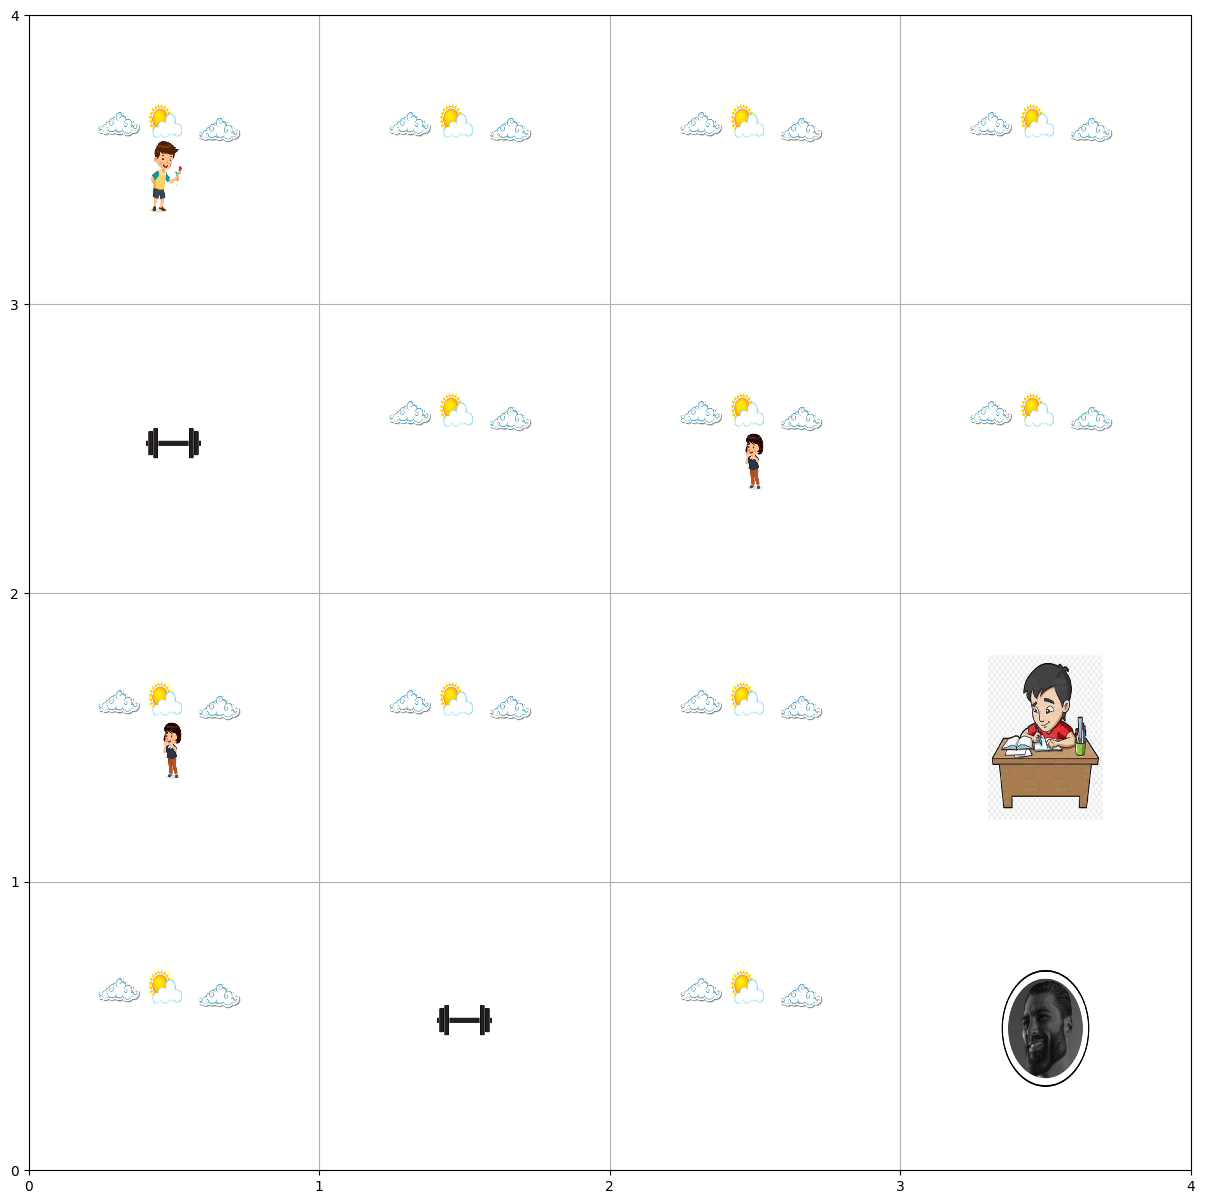

new_state:  {'position': array([0, 2]), 'terminate_position': array([3, 0])}
Reward:  10
result:  False
Information:  {}
Total 10


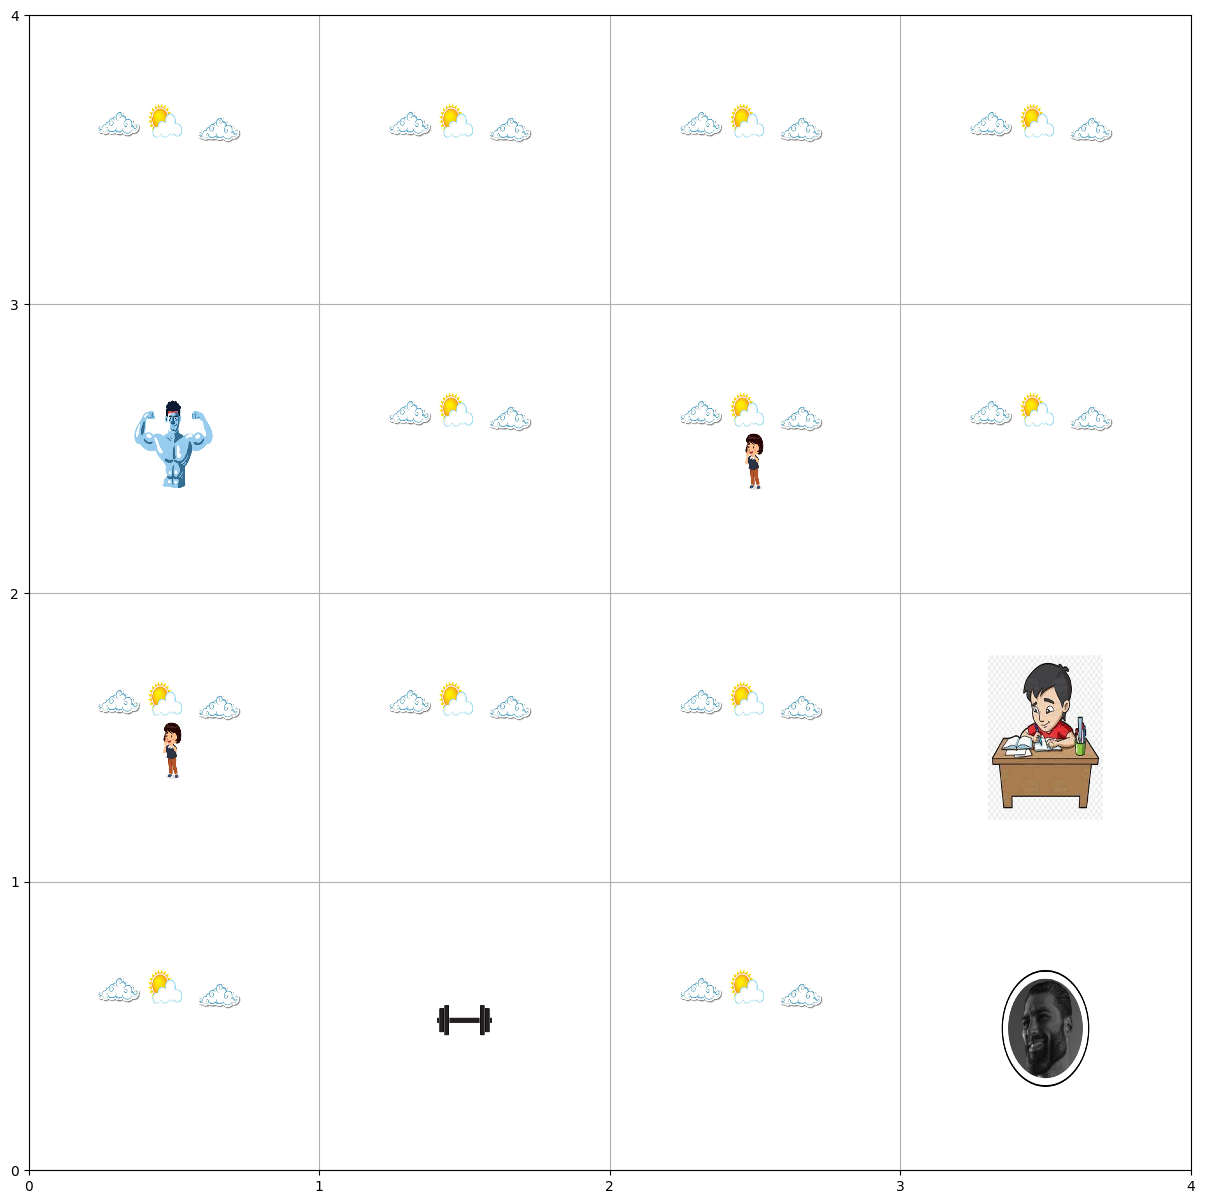

new_state:  {'position': array([1, 2]), 'terminate_position': array([3, 0])}
Reward:  0
result:  False
Information:  {}
Total 10


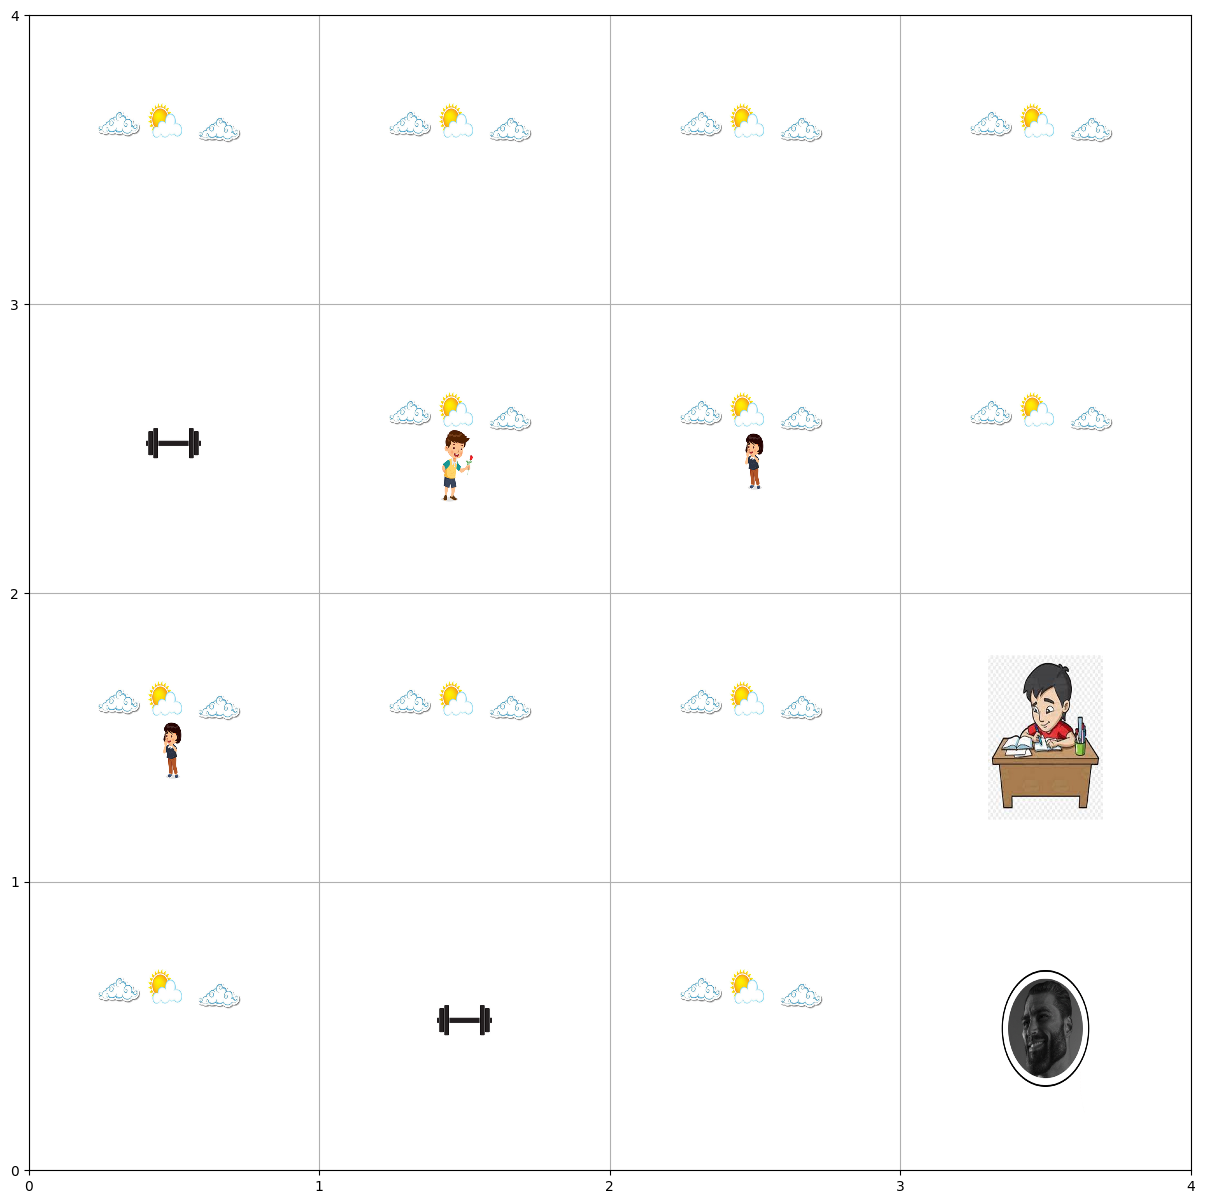

new_state:  {'position': array([0, 2]), 'terminate_position': array([3, 0])}
Reward:  10
result:  False
Information:  {}
Total 20


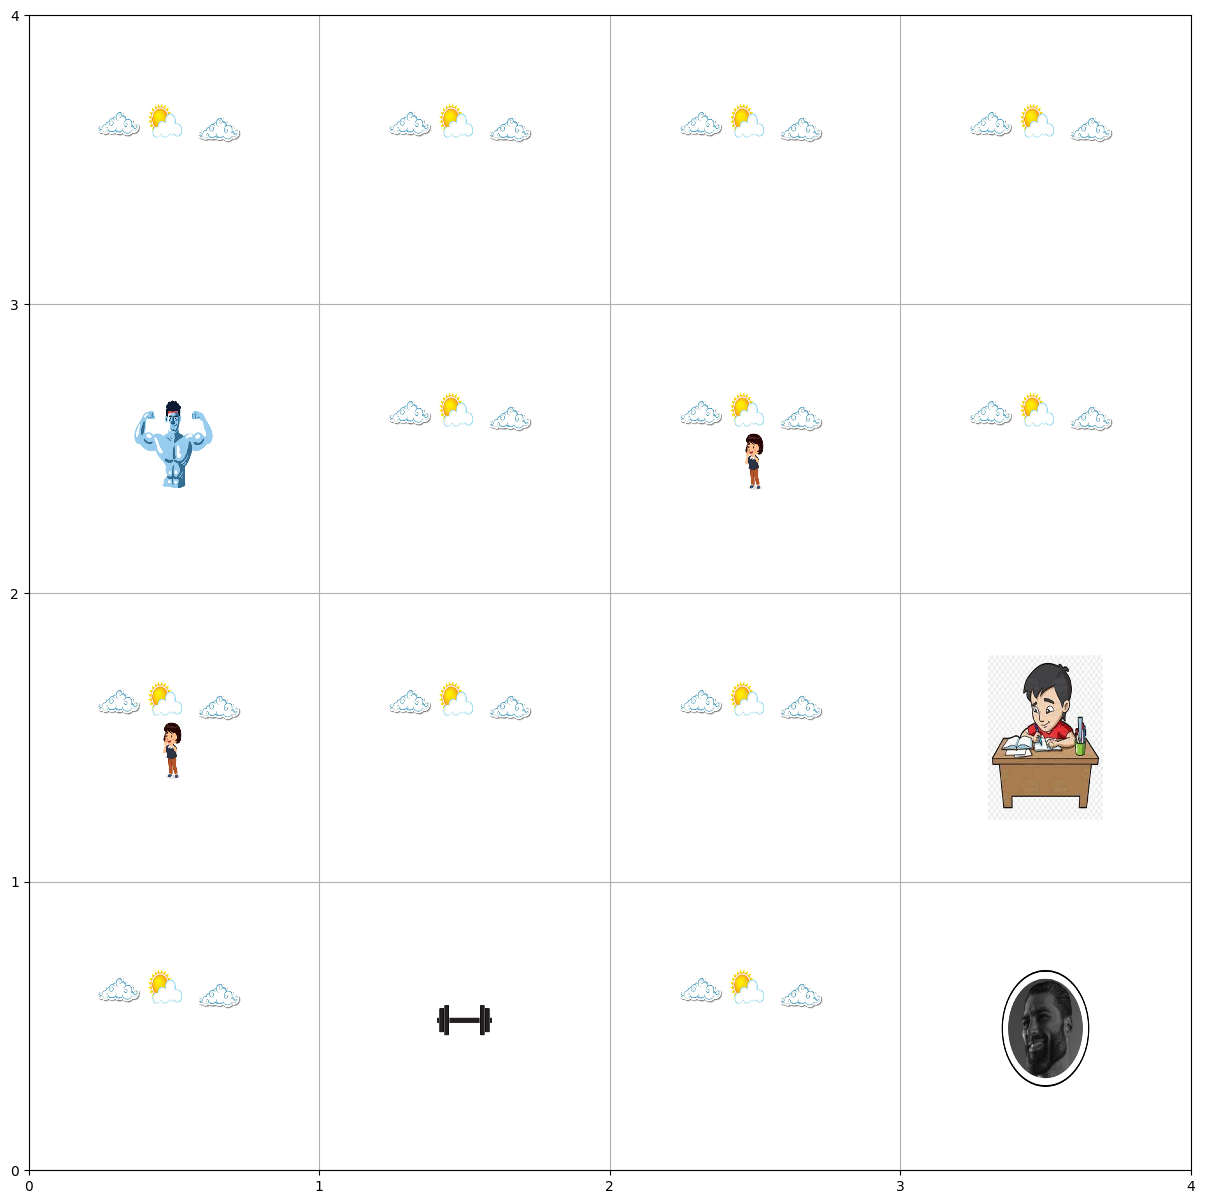

new_state:  {'position': array([1, 2]), 'terminate_position': array([3, 0])}
Reward:  0
result:  False
Information:  {}
Total 20


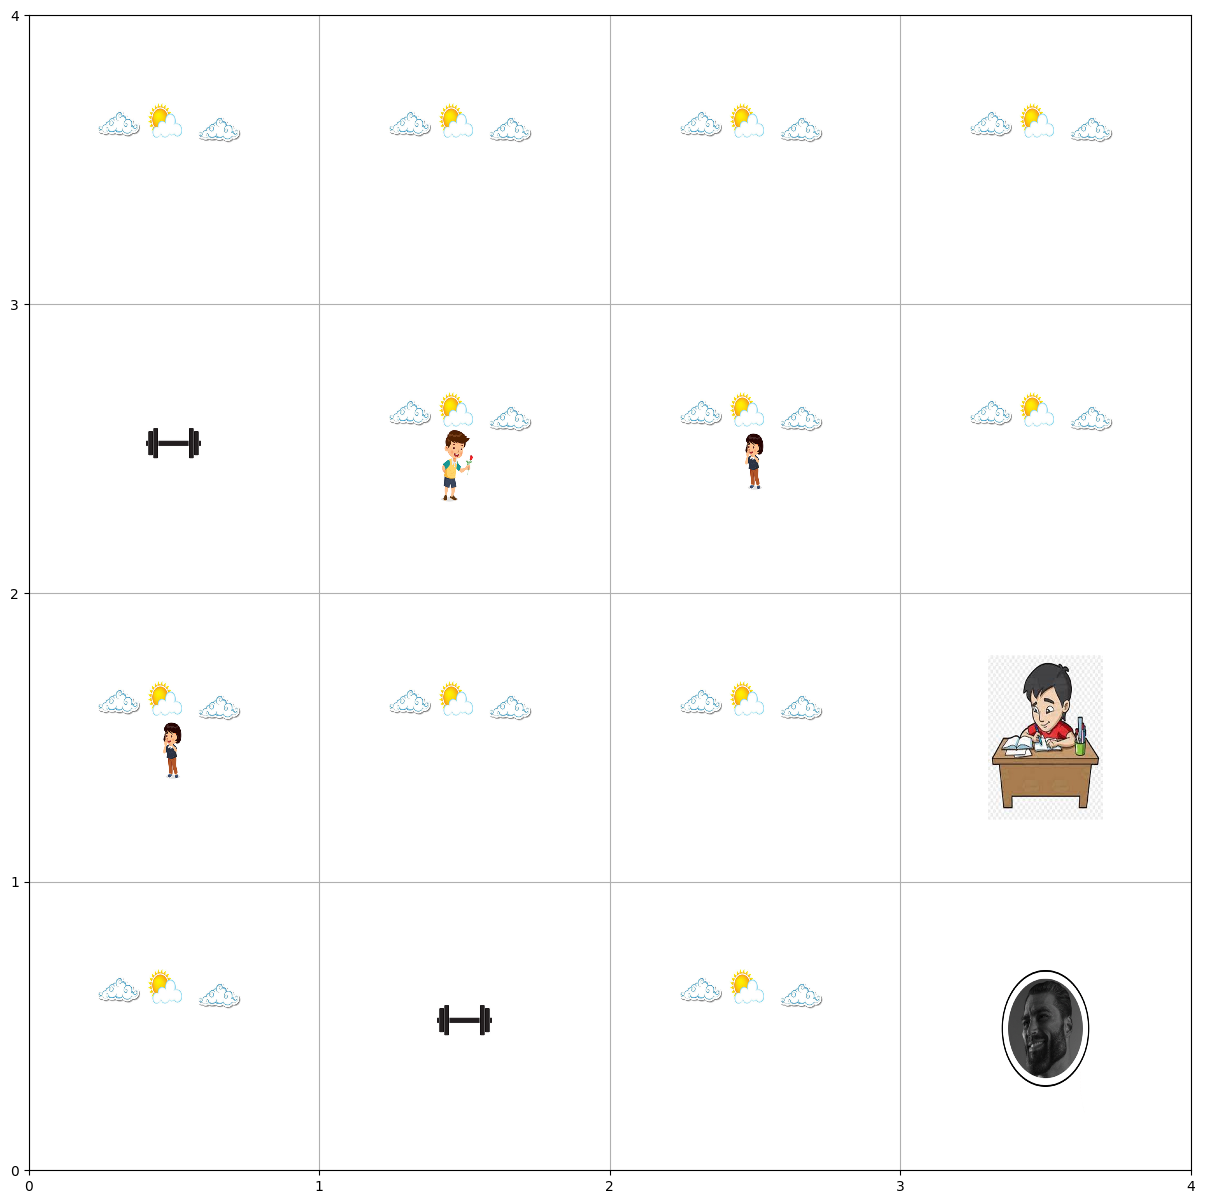

new_state:  {'position': array([1, 3]), 'terminate_position': array([3, 0])}
Reward:  0
result:  False
Information:  {}
Total 20


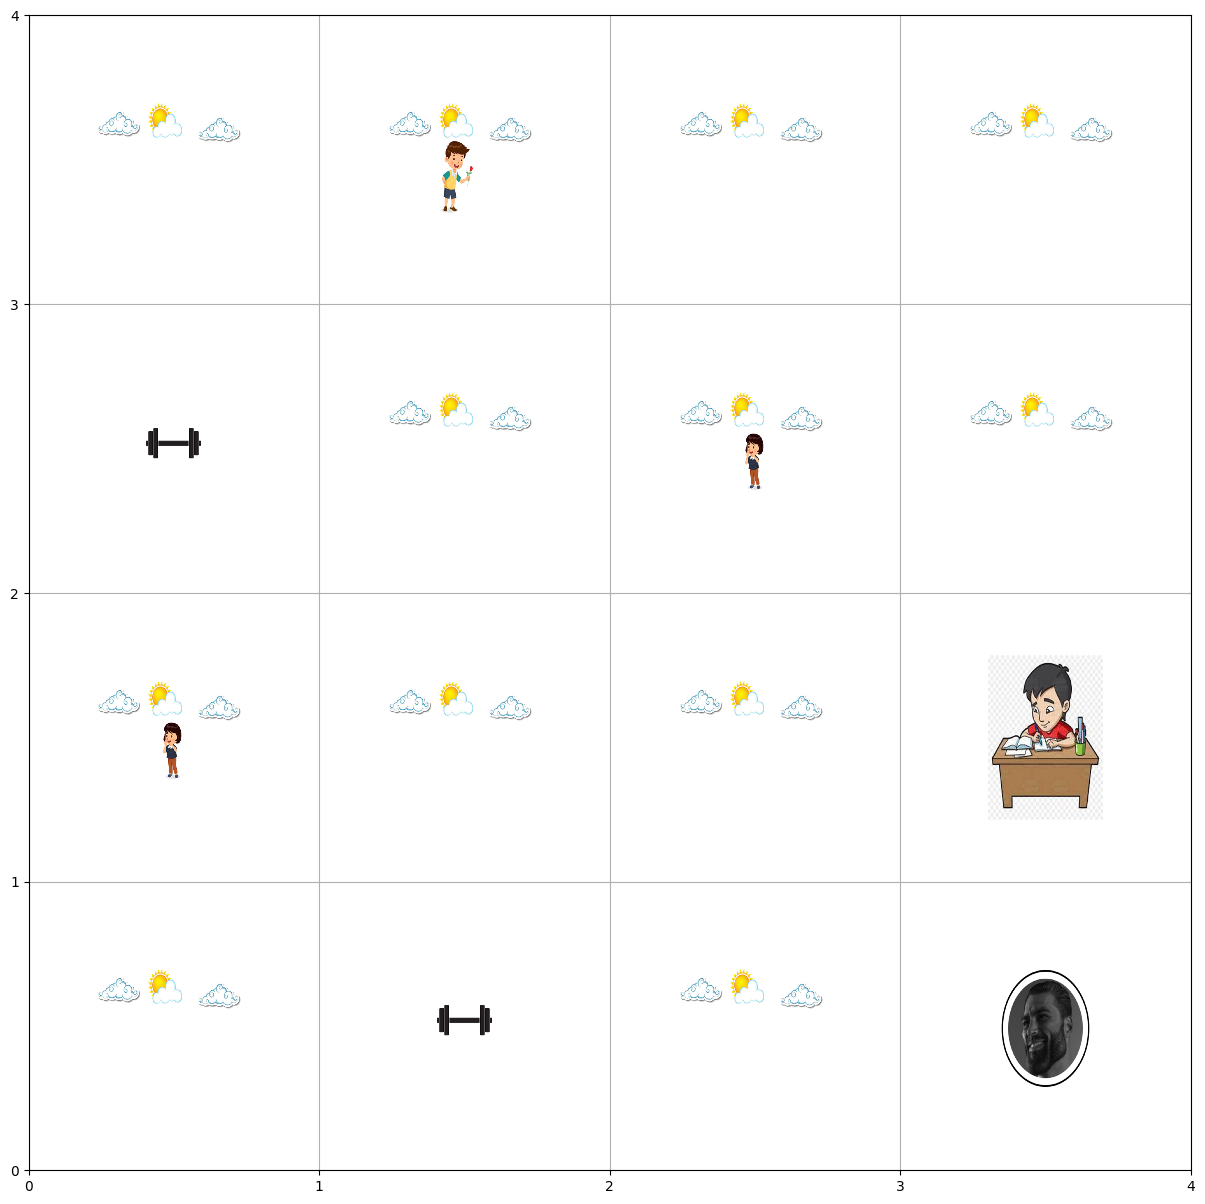

new_state:  {'position': array([1, 2]), 'terminate_position': array([3, 0])}
Reward:  0
result:  False
Information:  {}
Total 20


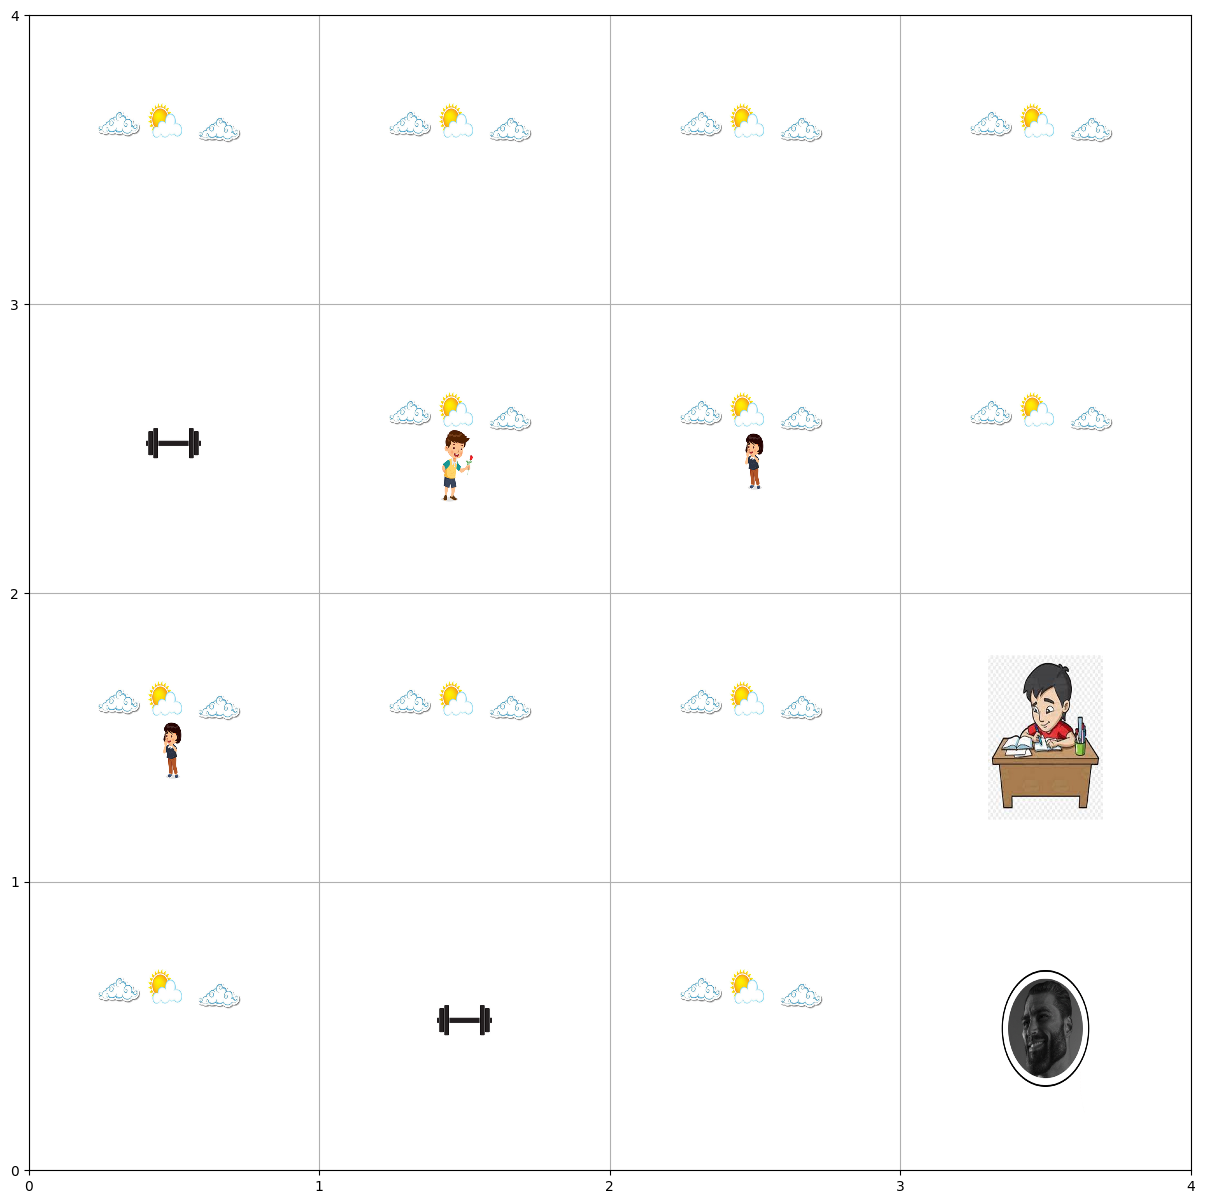

new_state:  {'position': array([0, 2]), 'terminate_position': array([3, 0])}
Reward:  10
result:  False
Information:  {}
Total 30


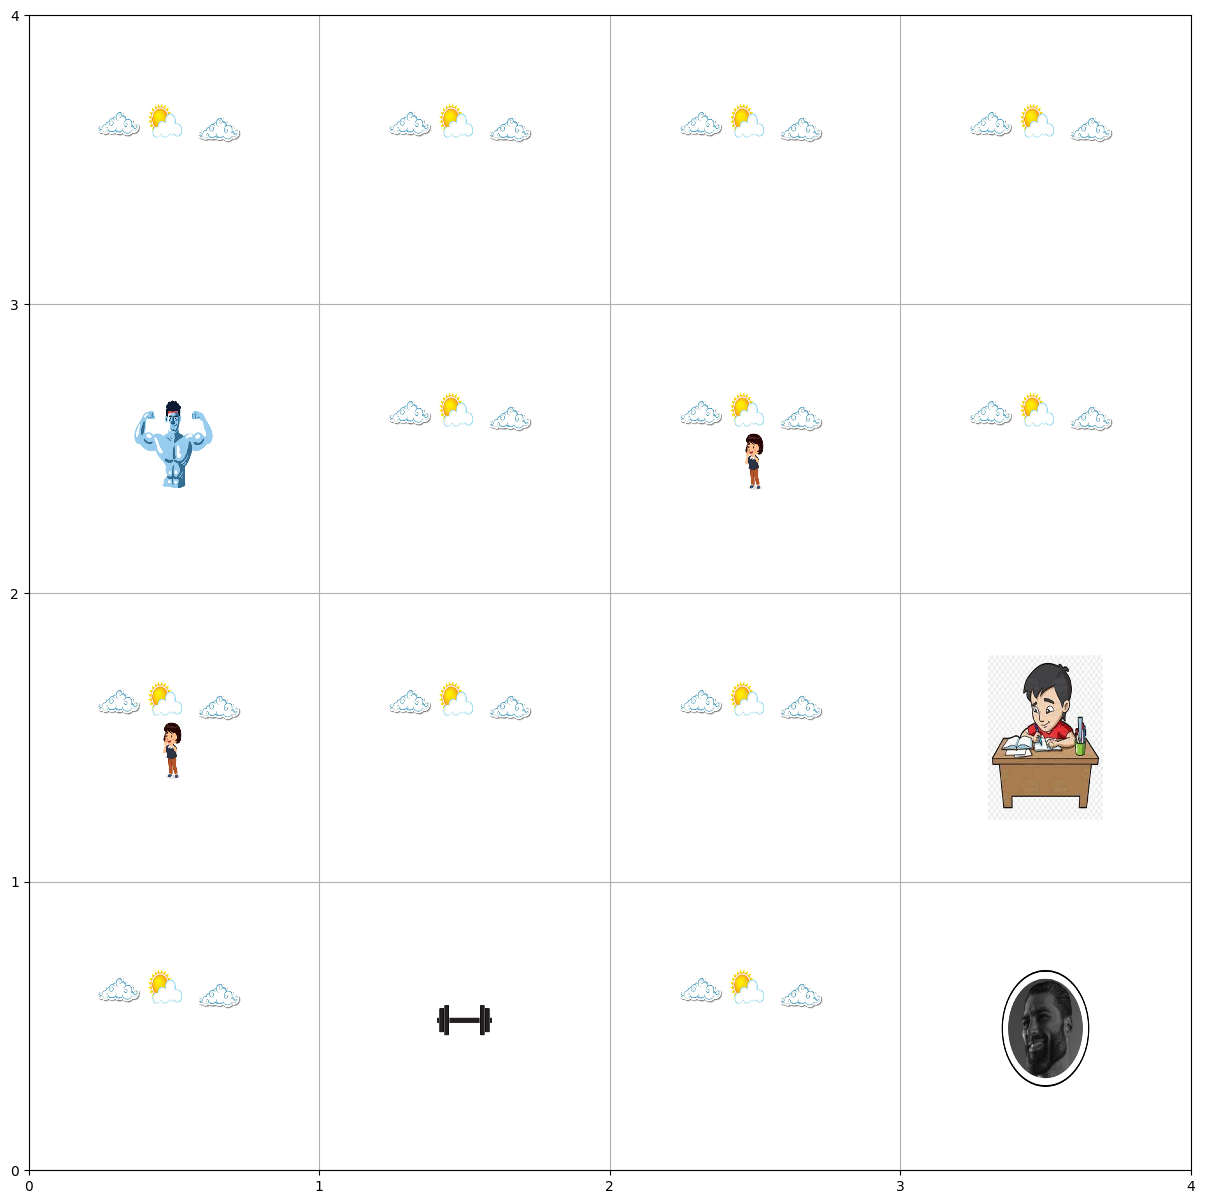

new_state:  {'position': array([0, 2]), 'terminate_position': array([3, 0])}
Reward:  10
result:  False
Information:  {}
Total 40


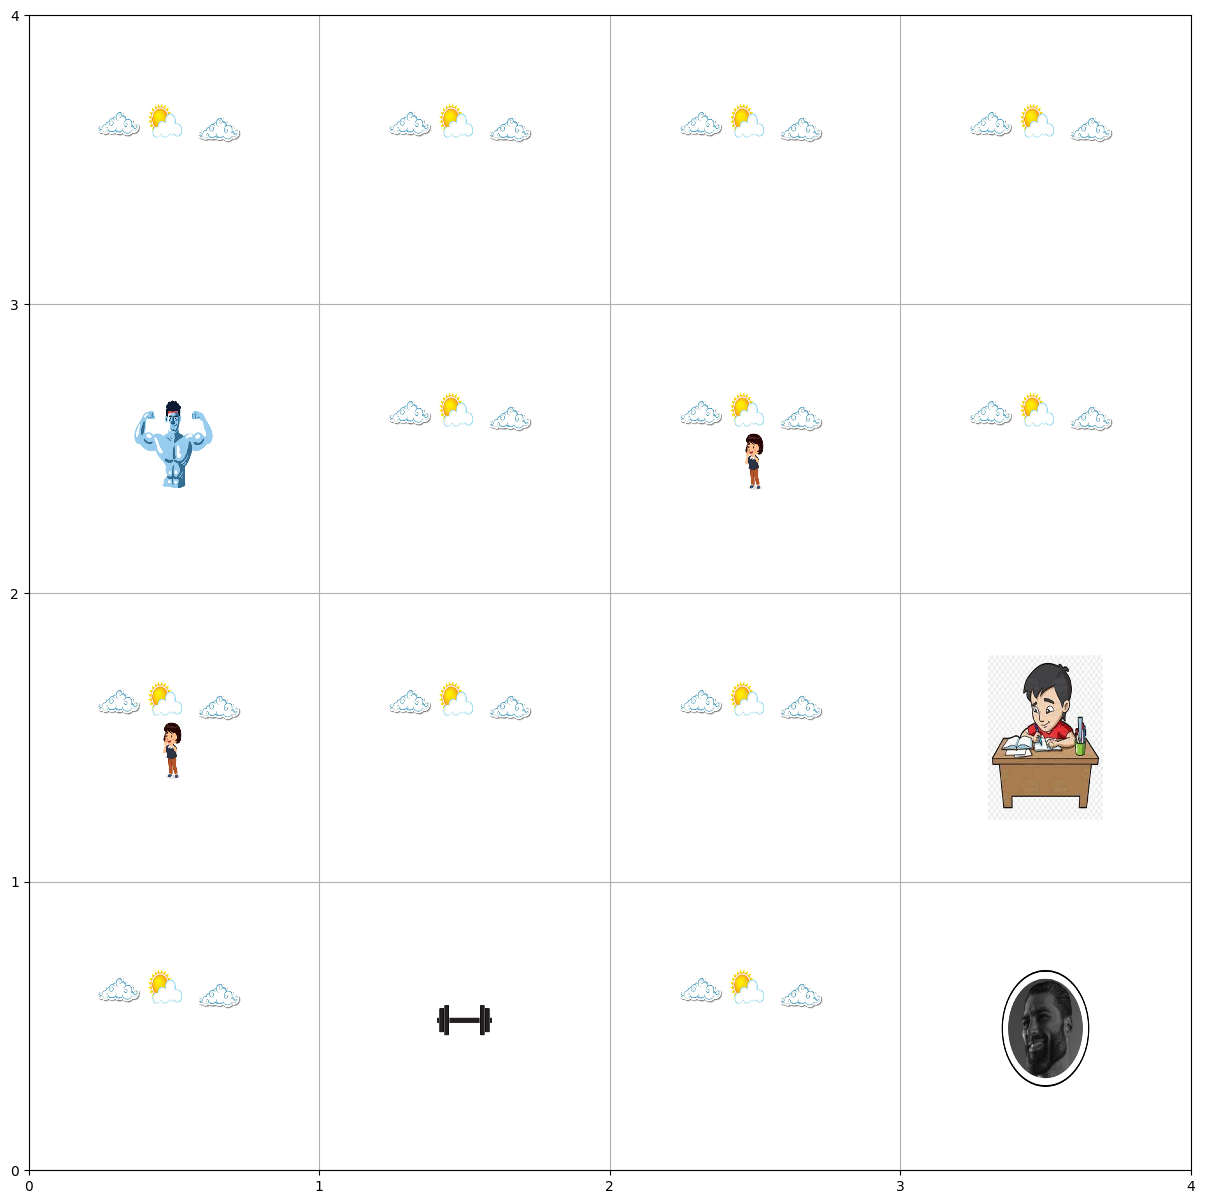

new_state:  {'position': array([0, 3]), 'terminate_position': array([3, 0])}
Reward:  0
result:  False
Information:  {}
Total 40


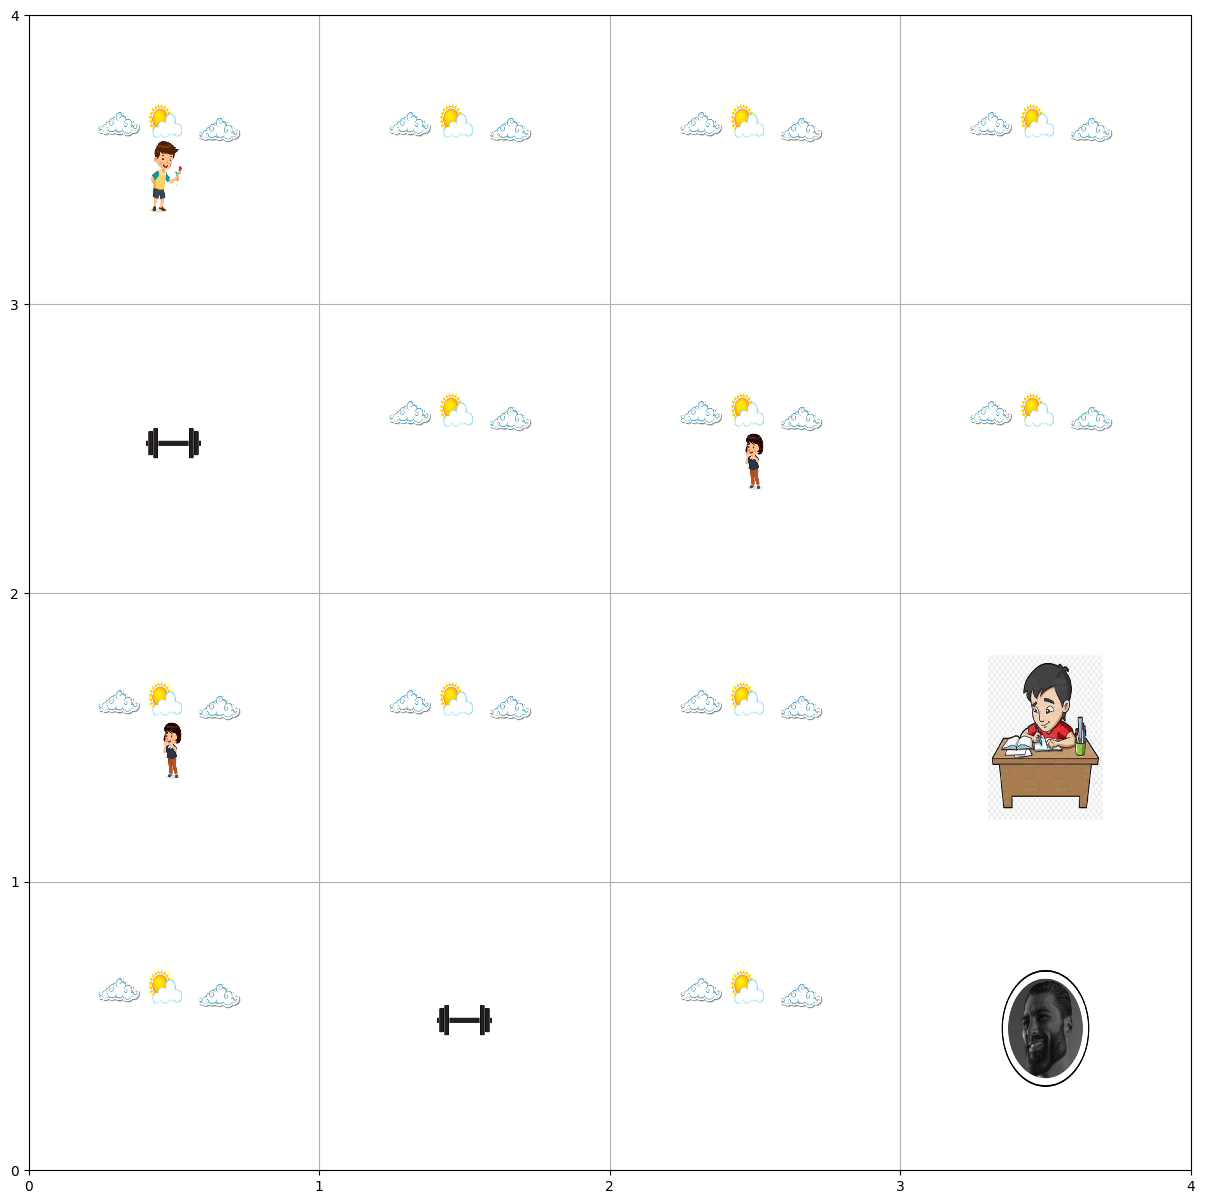

new_state:  {'position': array([0, 2]), 'terminate_position': array([3, 0])}
Reward:  10
result:  False
Information:  {}
Total 50


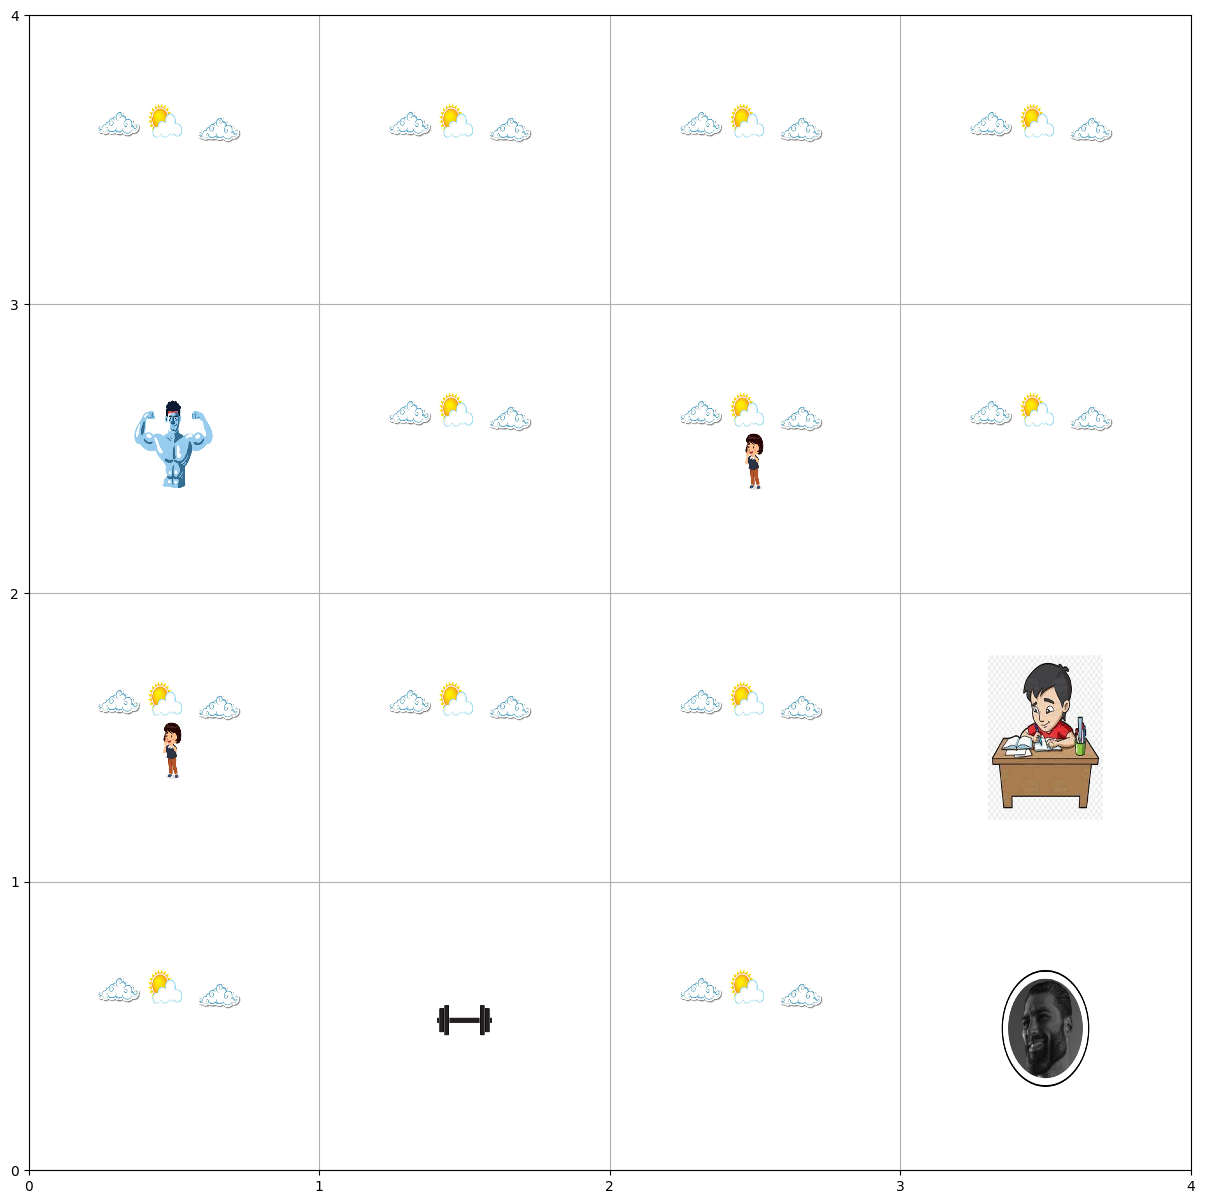

new_state:  {'position': array([0, 1]), 'terminate_position': array([3, 0])}
Reward:  -10
result:  False
Information:  {}
Total 40


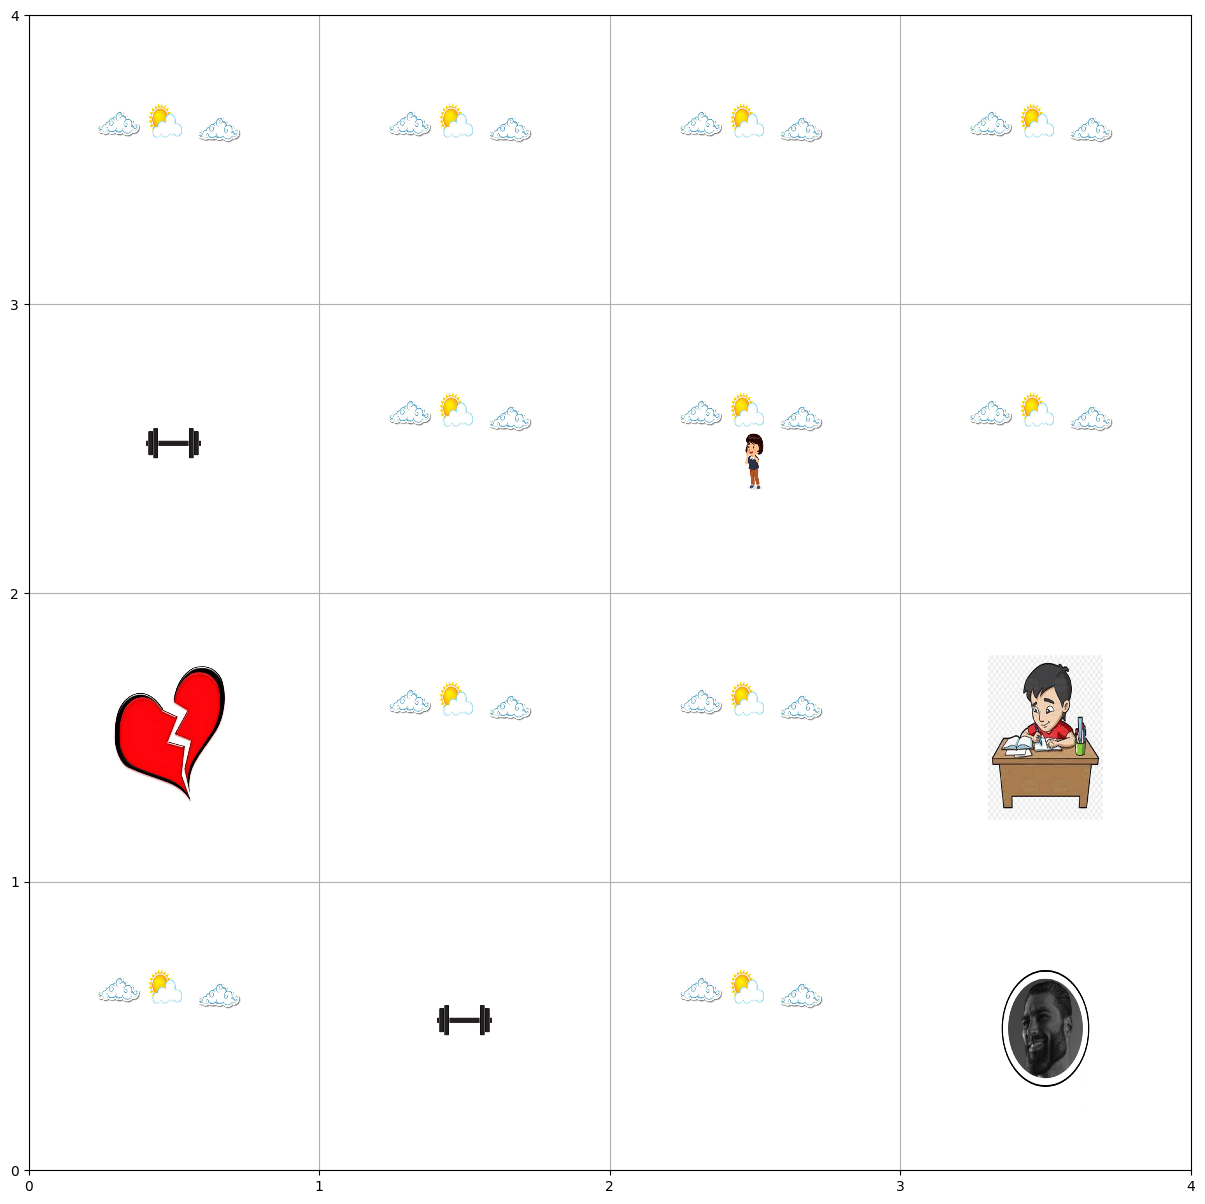

new_state:  {'position': array([0, 1]), 'terminate_position': array([3, 0])}
Reward:  -10
result:  False
Information:  {}
Total 30


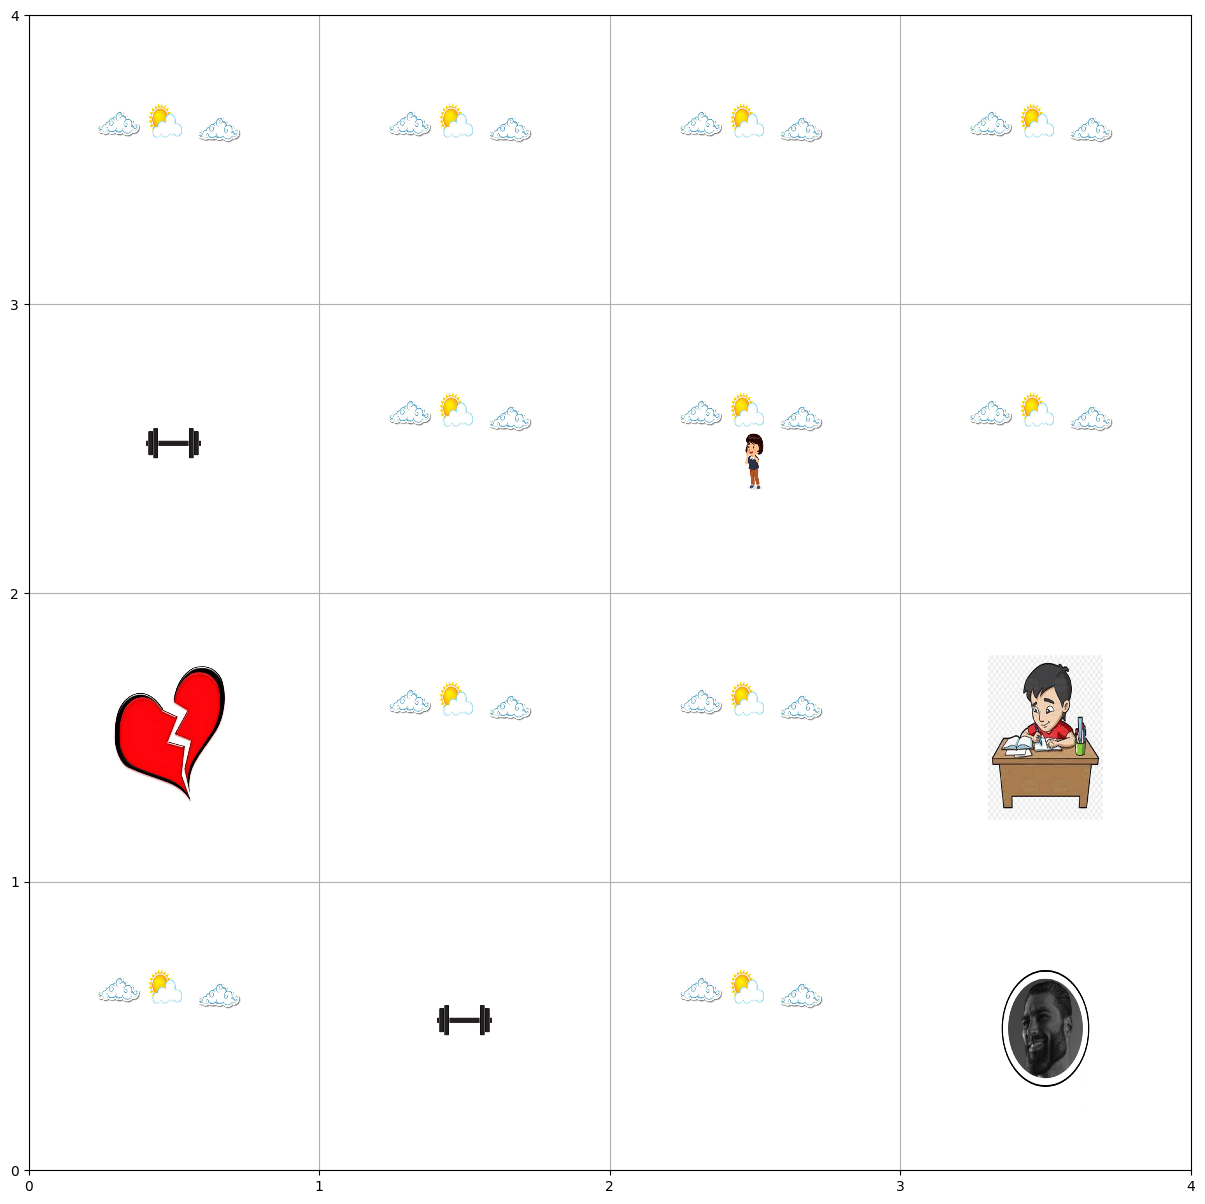

new_state:  {'position': array([1, 1]), 'terminate_position': array([3, 0])}
Reward:  0
result:  False
Information:  {}
Total 30


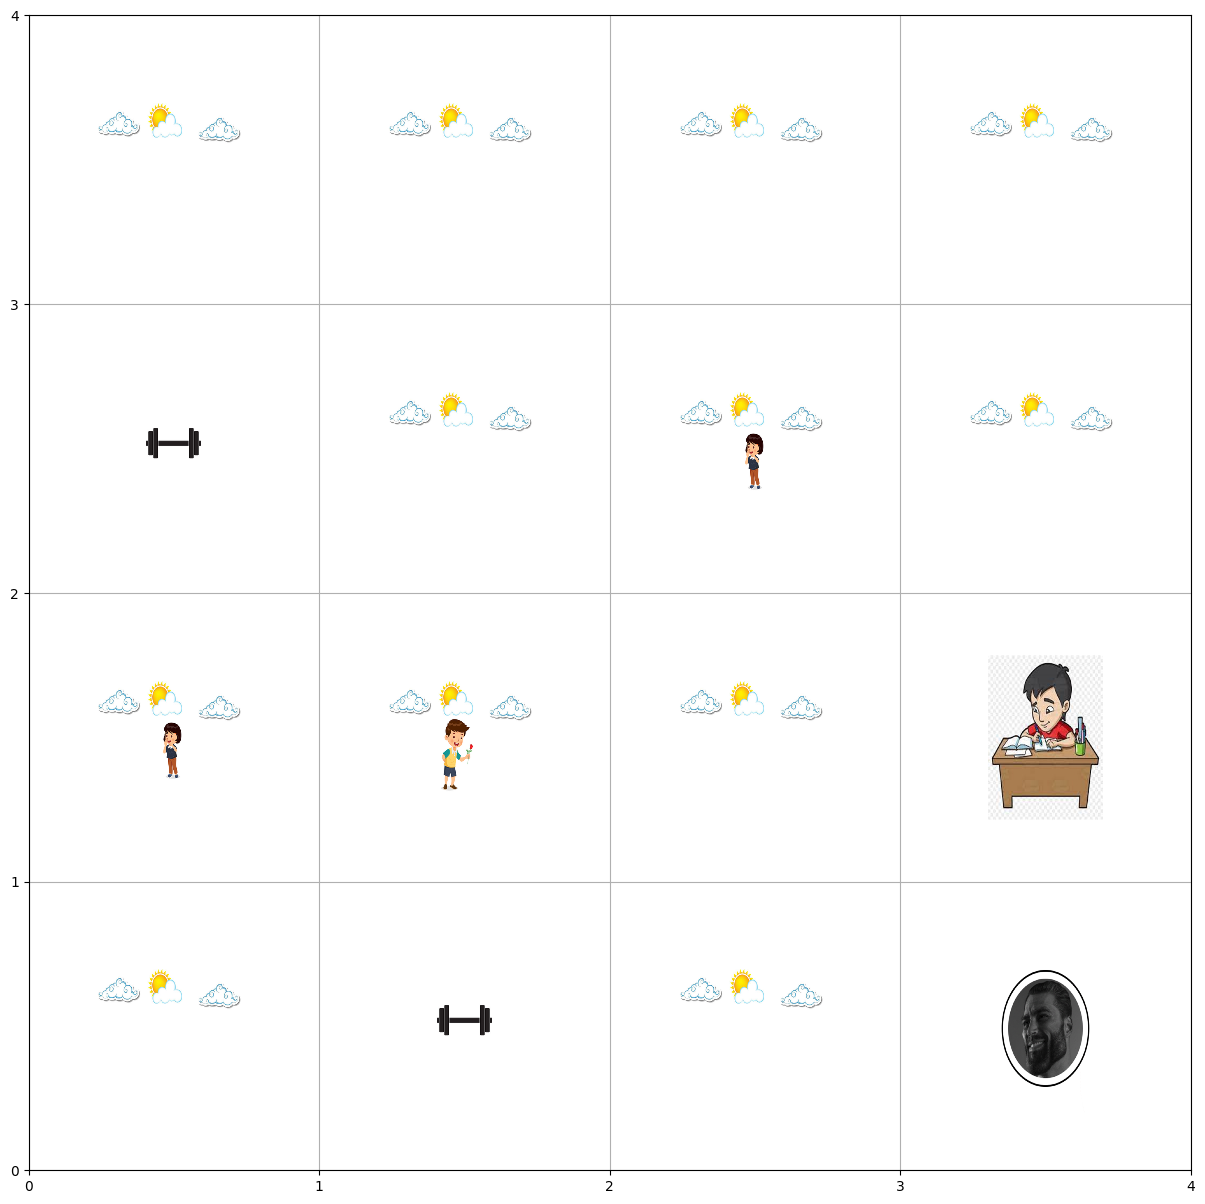

new_state:  {'position': array([1, 2]), 'terminate_position': array([3, 0])}
Reward:  0
result:  False
Information:  {}
Total 30


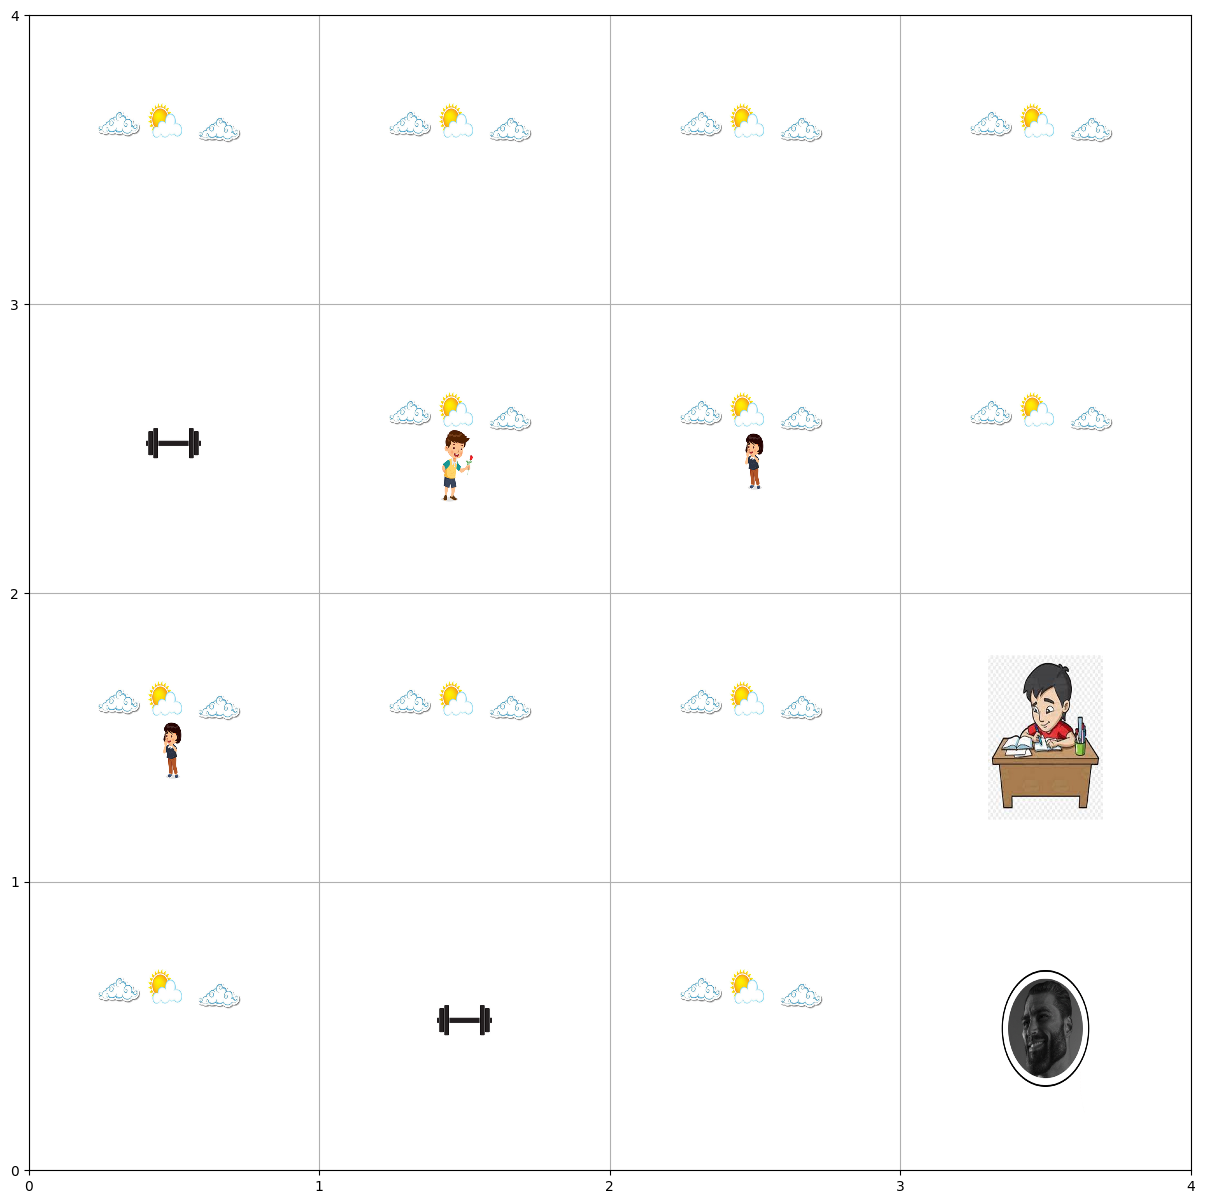

new_state:  {'position': array([2, 2]), 'terminate_position': array([3, 0])}
Reward:  -10
result:  False
Information:  {}
Total 20


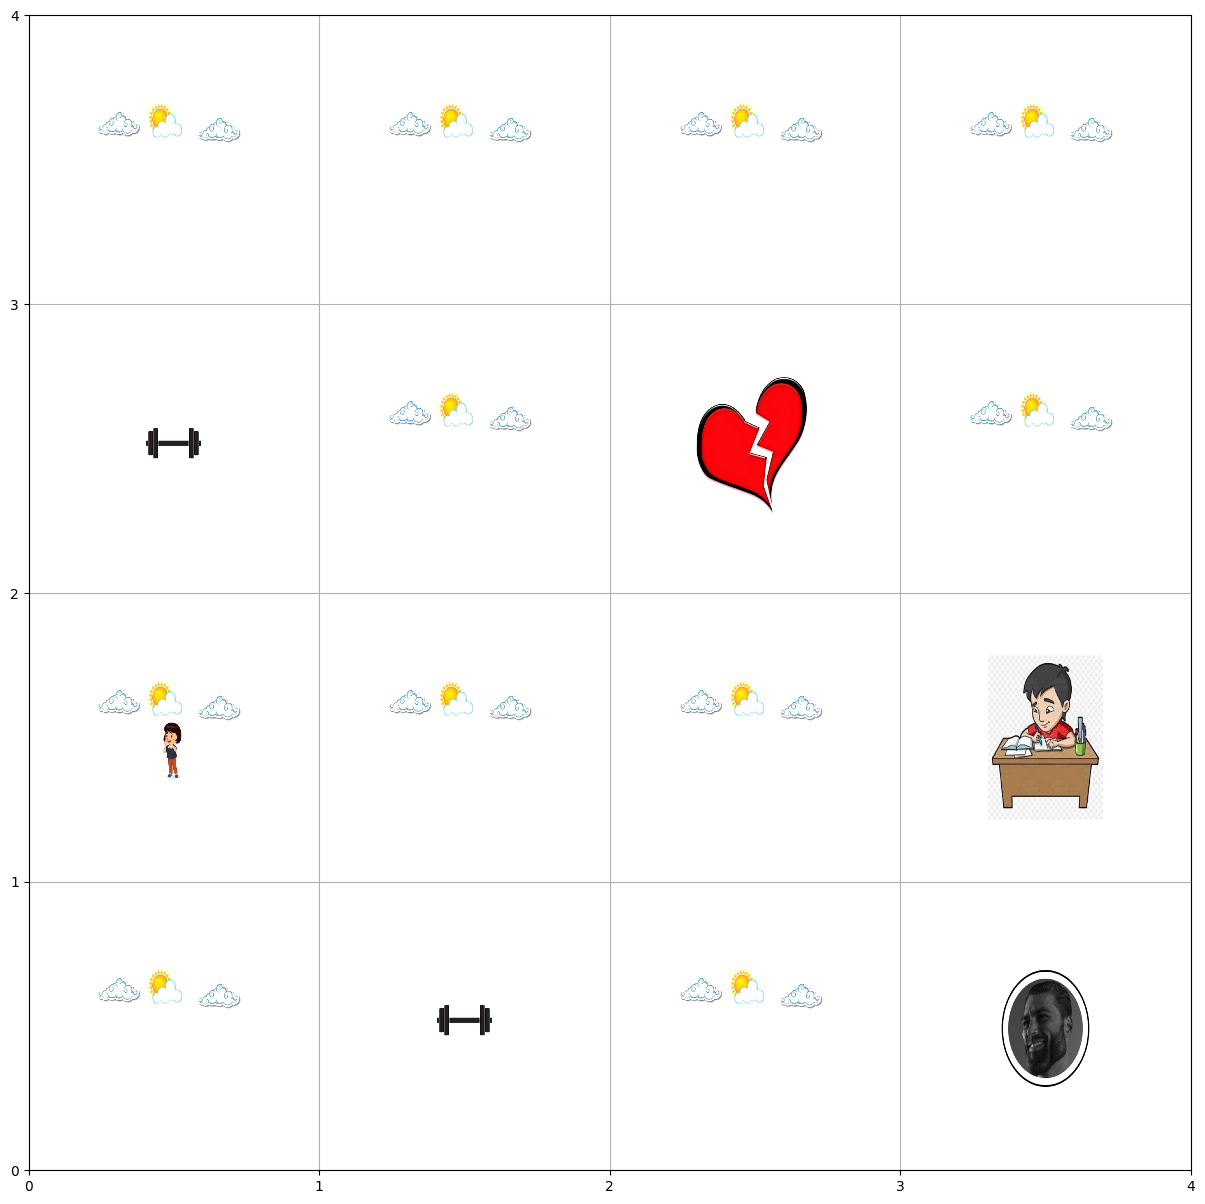

new_state:  {'position': array([3, 2]), 'terminate_position': array([3, 0])}
Reward:  0
result:  False
Information:  {}
Total 20


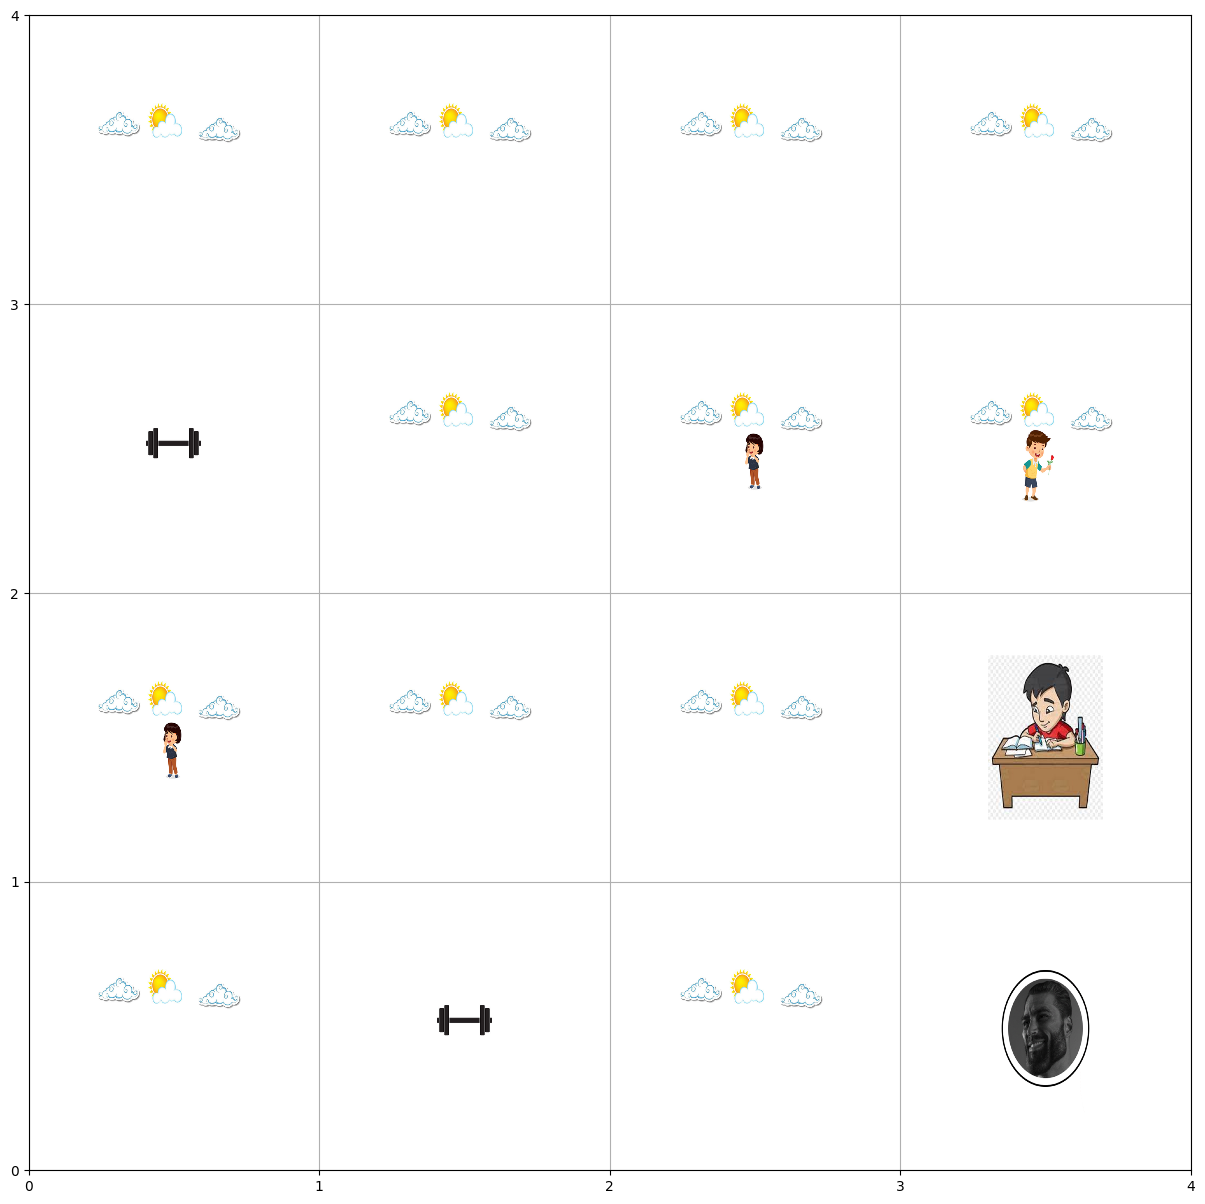

new_state:  {'position': array([3, 3]), 'terminate_position': array([3, 0])}
Reward:  0
result:  False
Information:  {}
Total 20


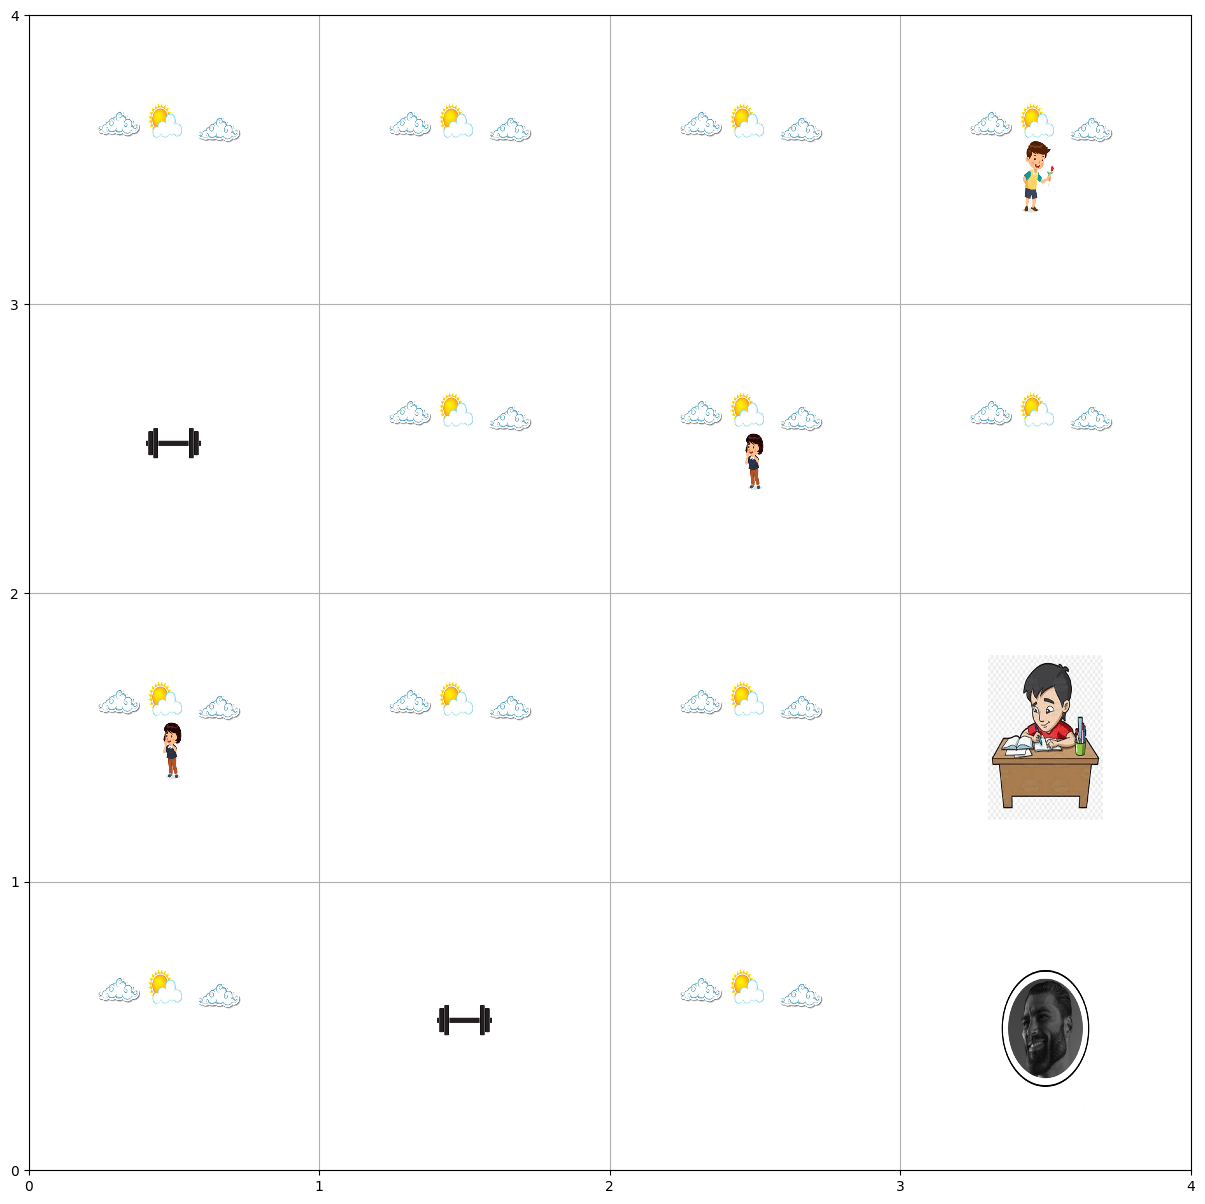

new_state:  {'position': array([3, 3]), 'terminate_position': array([3, 0])}
Reward:  0
result:  False
Information:  {}
Total 20


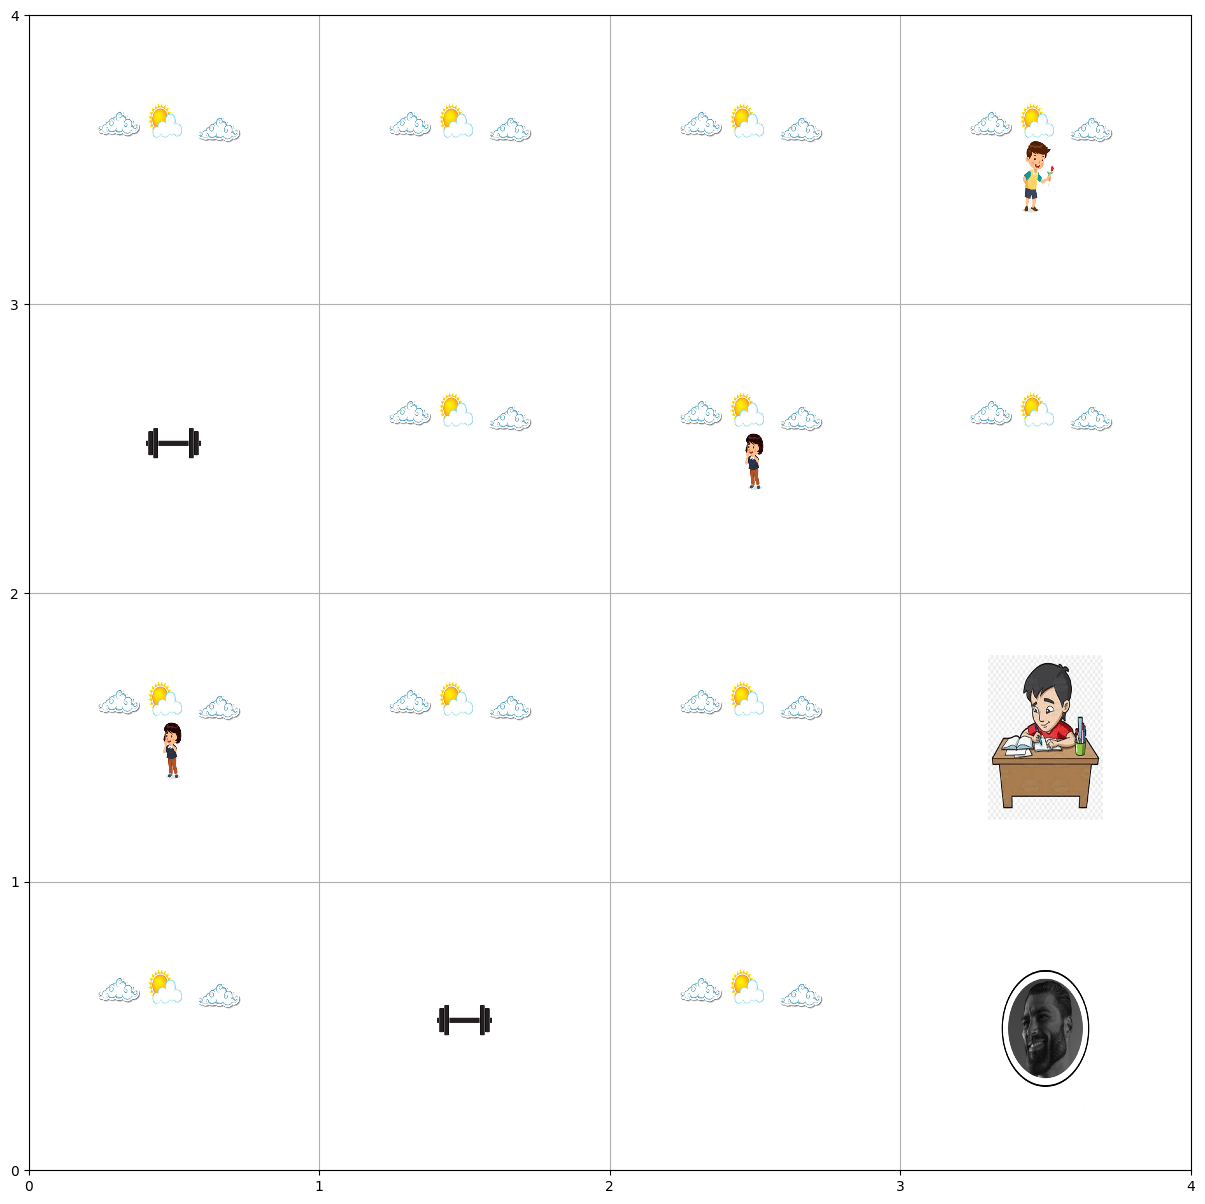

new_state:  {'position': array([3, 3]), 'terminate_position': array([3, 0])}
Reward:  0
result:  False
Information:  {}
Total 20


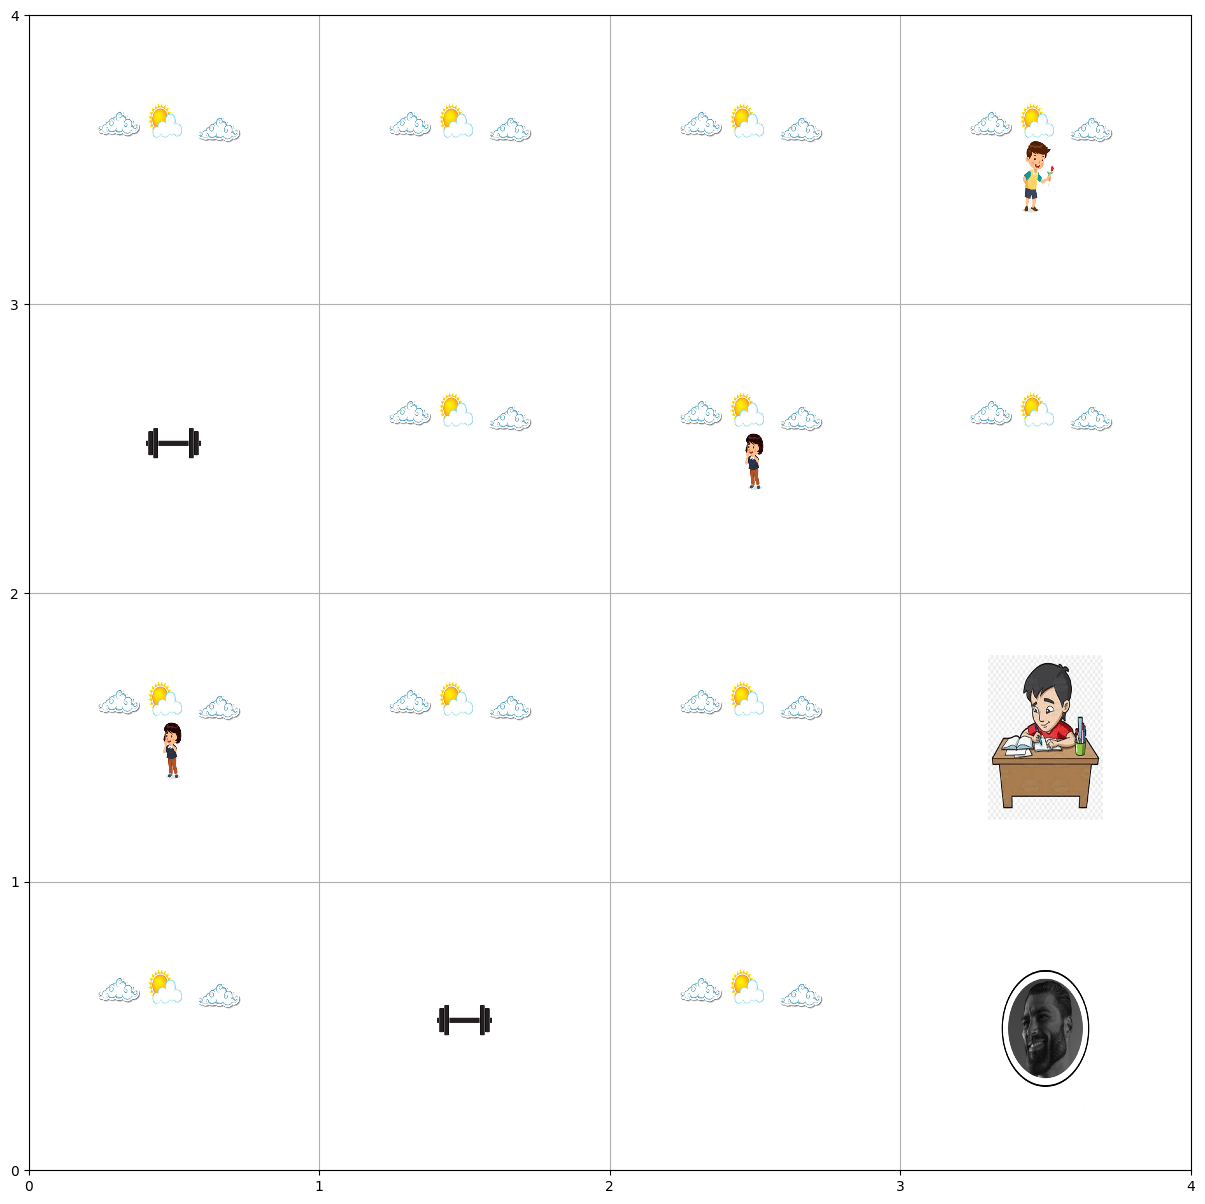

new_state:  {'position': array([2, 3]), 'terminate_position': array([3, 0])}
Reward:  0
result:  False
Information:  {}
Total 20


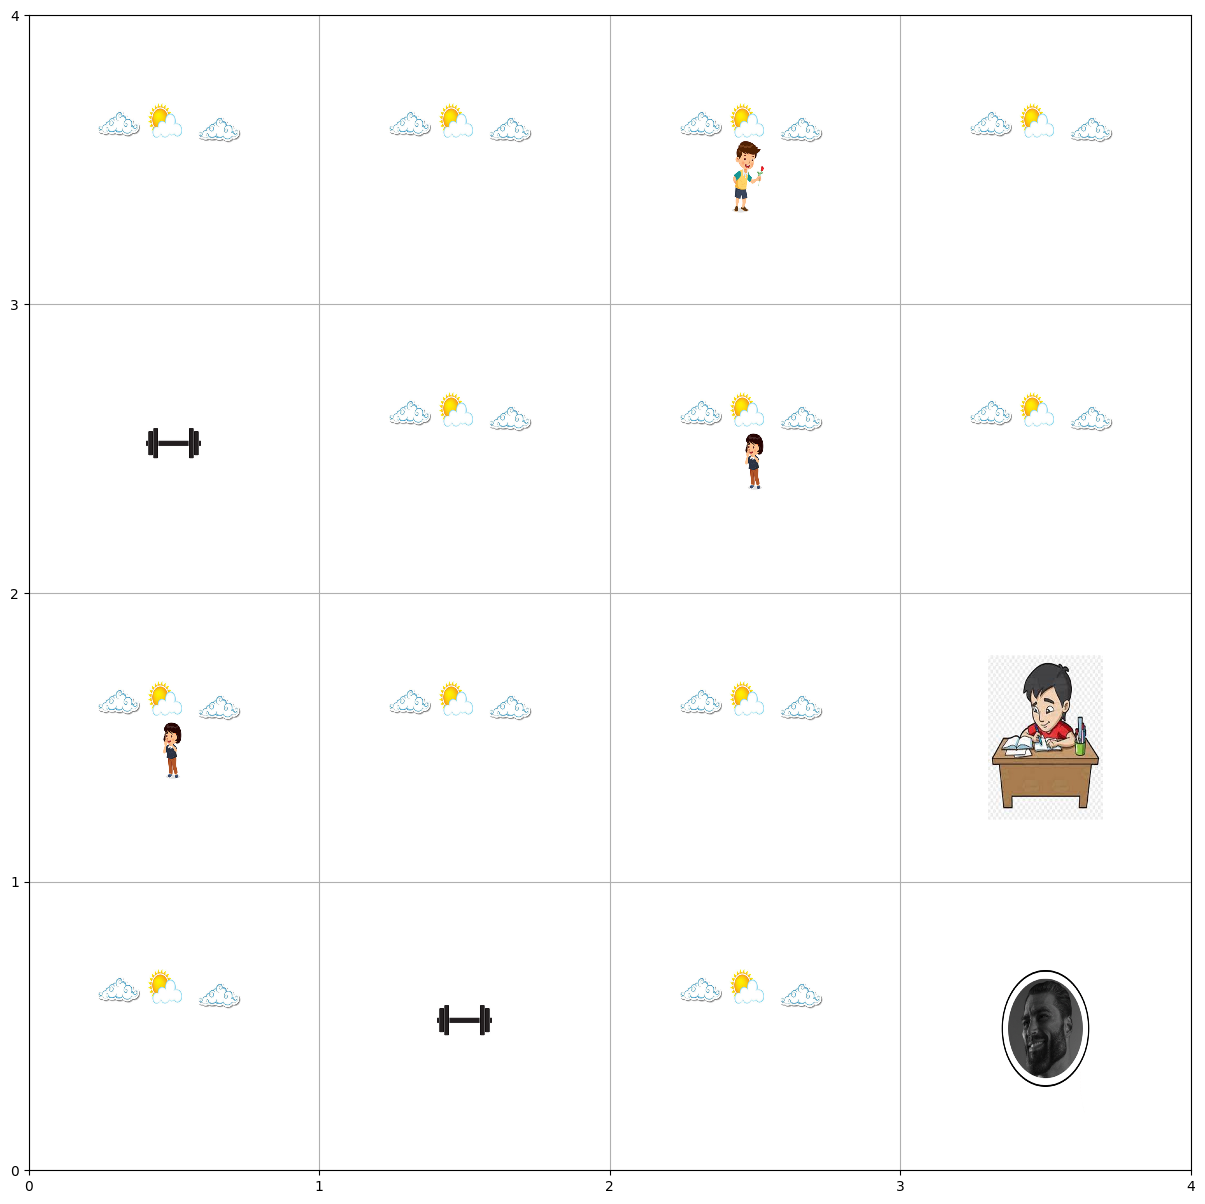

new_state:  {'position': array([3, 3]), 'terminate_position': array([3, 0])}
Reward:  0
result:  False
Information:  {}
Total 20


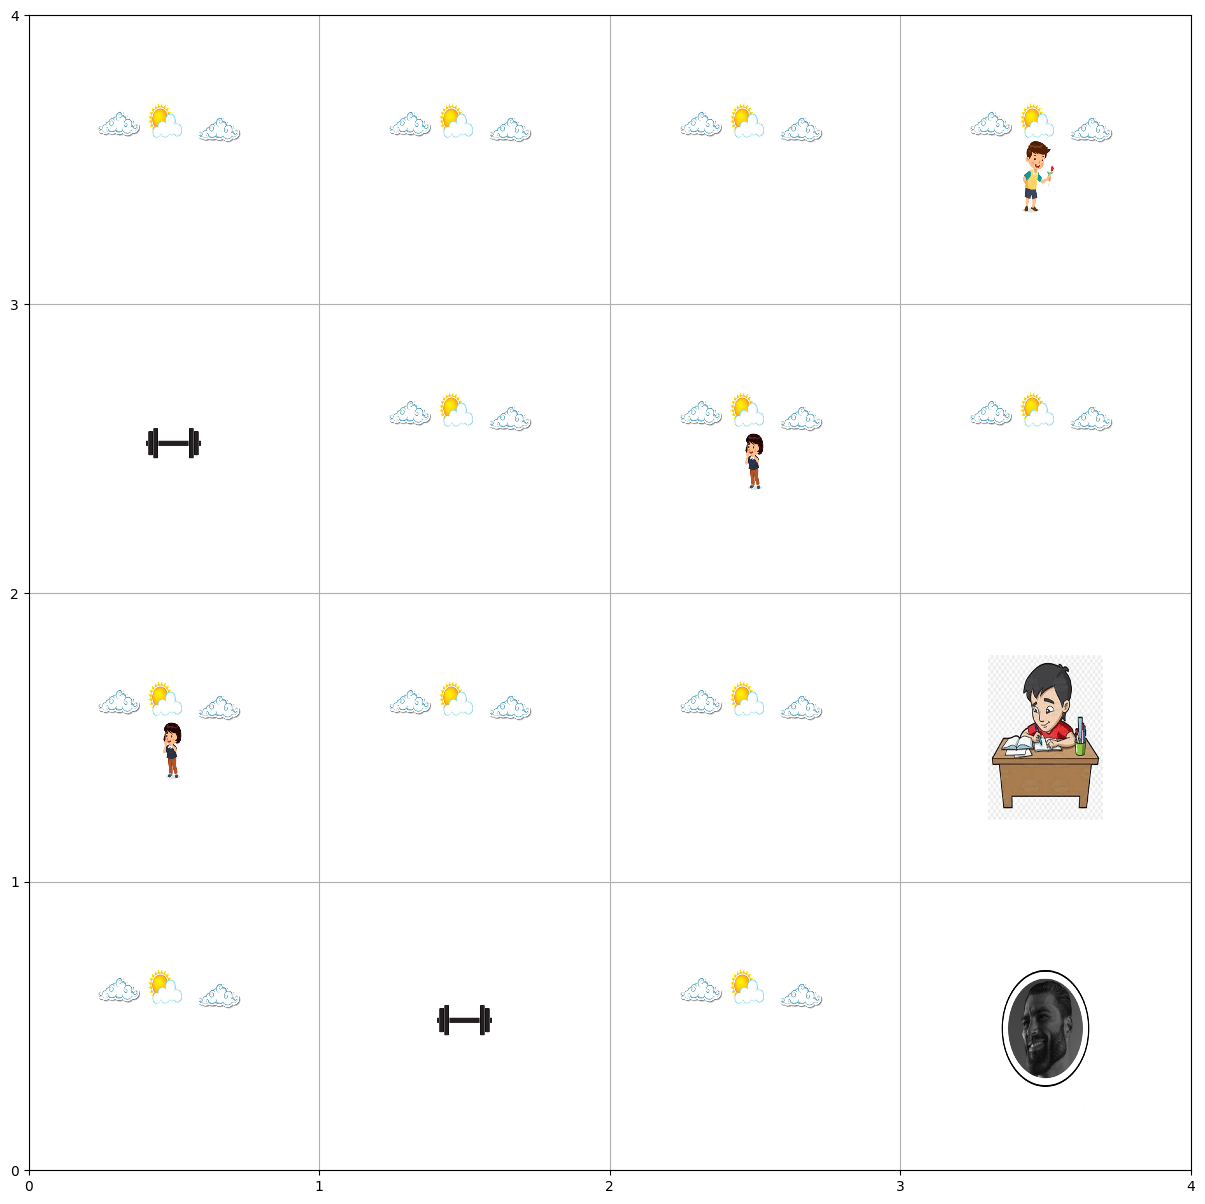

new_state:  {'position': array([2, 3]), 'terminate_position': array([3, 0])}
Reward:  0
result:  False
Information:  {}
Total 20


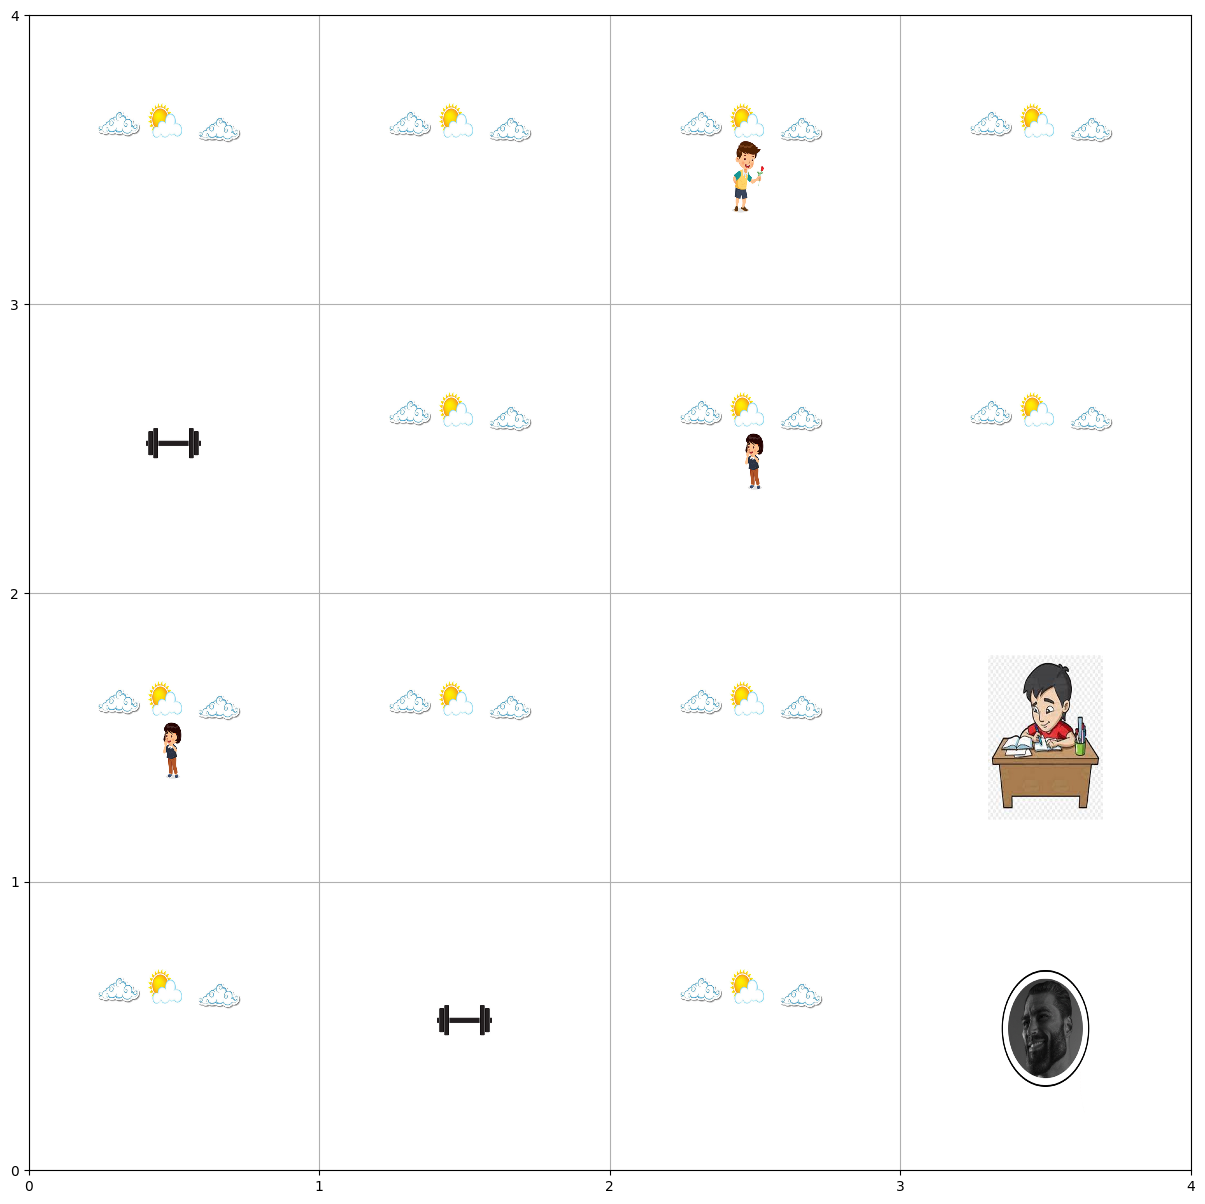

new_state:  {'position': array([2, 2]), 'terminate_position': array([3, 0])}
Reward:  -10
result:  False
Information:  {}
Total 10


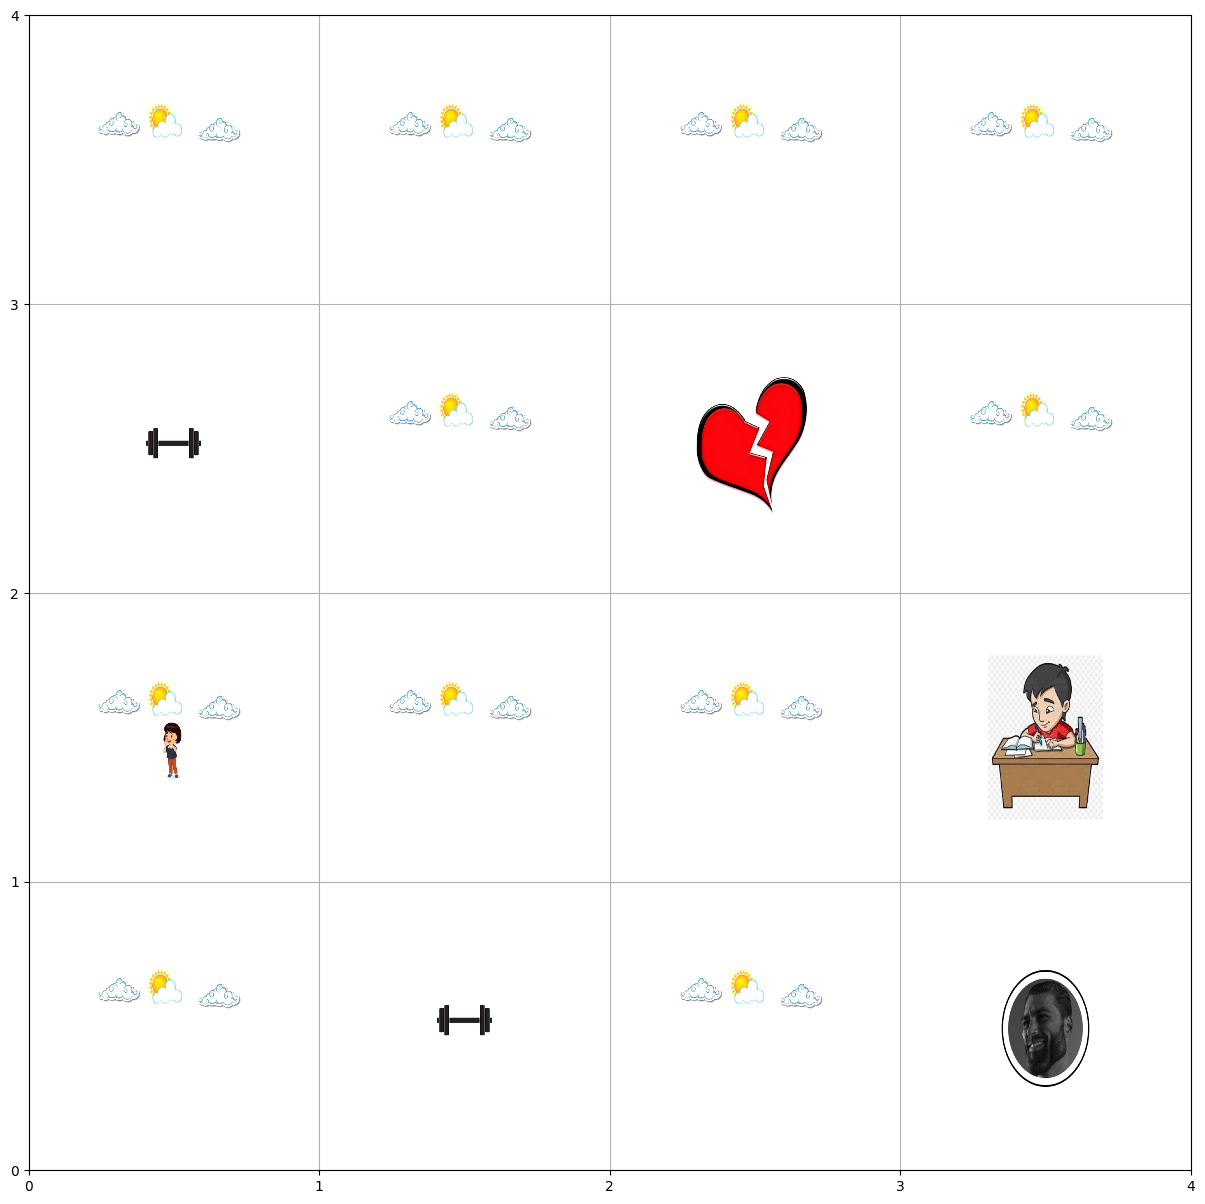

new_state:  {'position': array([1, 2]), 'terminate_position': array([3, 0])}
Reward:  0
result:  True
Information:  {}
Total 10


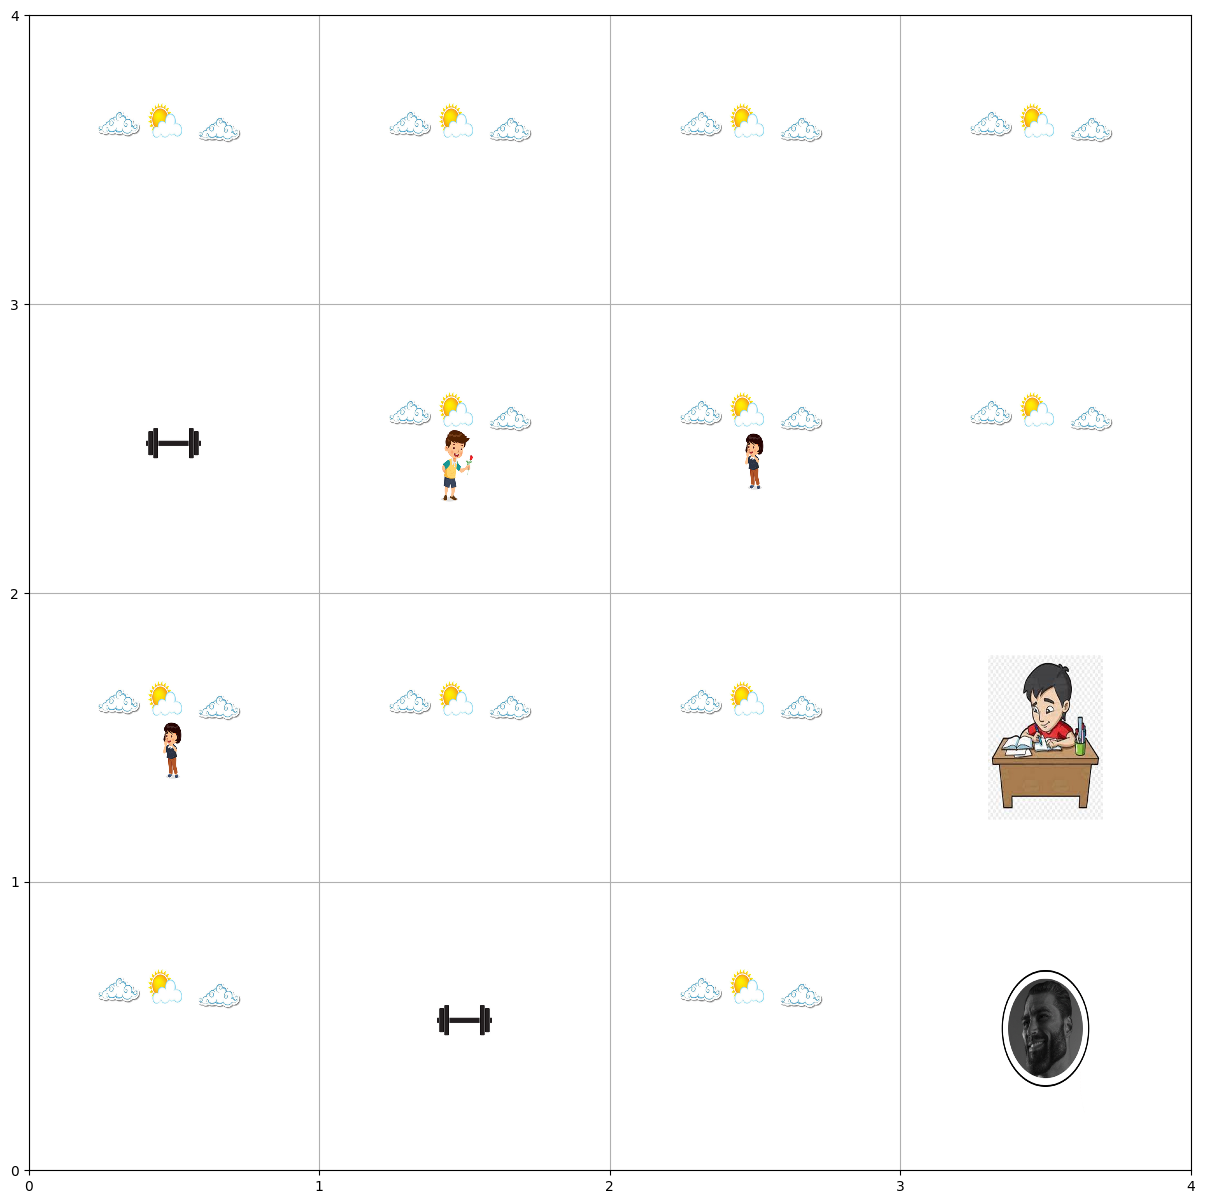

In [6]:

reward1 = 0
list1 = [0, 1, 2, 3]
env=Loveworld()
while(True):
            res = random.choice(list1)
            new_state, reward, result, info1 = env.step(res)
            print("new_state: ",new_state)
            print("Reward: ",reward)
            print("result: ",result)
            print("Information: ",info1)
            reward1 += reward
            print("Total", reward1)
            env.render(plot=True)
            if(reward == 200 or result):
                break

In [11]:


class SarsaAgent:
    
    def __init__(self, grid, alpha=0.1, gamma=0.99, epsilon=0.98, epsilon_decay=0.009, episodes=100):
        self.dict_q1 = {}
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon
        self.epsilon_decay = epsilon_decay
        self.episodes = episodes
        self.stateMap = grid
        self.arr = []
        for state in grid.values():
            self.dict_q1[state] = np.zeros(4)
  
    


    def choose_nextaction(self,q_values, epsilon=0.01):
        # actions = [Action("up", 0), Action("down", 1), Action("left", 2), Action("right", 3)]

        actions = [0, 1, 2, 3]
        if(np.any(np.random.rand() < epsilon)):
            selected_action = random.choice(actions)
        else:
            selected_action = np.argmax(q_values)
        return selected_action
    def Q_value_calculation(self, reward, new_state, dict_q1, action, old_state):
        new_state = grid.get(tuple(new_state["position"]))
        q_old = dict_q1[old_state][int(action)]
        new_action = self.choose_nextaction(dict_q1[new_state])
        q_new_action = dict_q1[new_state][int(new_action)]
        dict_q1[old_state][int(action)] += self.alpha * (reward + (self.gamma * q_new_action) - q_old)
        return dict_q1[old_state][int(action)]


  


    def train(self):
        final_res = []
        c=0

        epsilon = self.epsilon
        epsilon_decay = self.epsilon_decay
        actions = [0, 1, 2, 3]
        env = Loveworld()
        env.reset()
        for i in range(self.episodes):
            env.reset()
            reward1 = 0
            result = False
        
    
       
            max_steps_per_episode=800
            for step in range(max_steps_per_episode):
                random_value = np.random.random()            
                state = grid.get(tuple(env.position))
                if(random_value < epsilon):
                    selected_action = random.choice(actions)
                else:
                    selected_action = np.argmax(self.dict_q1[state])
                new_state, reward, result, info1 = env.step(selected_action)
                self.Q_value_calculation(reward, new_state, self.dict_q1, selected_action, state)
                reward1 += reward
                print("Reward value for current step:", reward)

                if result:
                    # final_res.append(reward1)
                    break
      
       
            final_res.append(reward1)
                    
            epsilon -= (epsilon * epsilon_decay)
            self.arr.append(epsilon)
                
        env.render() 
        return self.arr, final_res


      

Reward value for current step: 0
Reward value for current step: 0
Reward value for current step: 0
Reward value for current step: 0
Reward value for current step: 0
Reward value for current step: 0
Reward value for current step: -10
Reward value for current step: 0
Reward value for current step: 0
Reward value for current step: 0
Reward value for current step: 0
Reward value for current step: 0
Reward value for current step: 0
Reward value for current step: 0
Reward value for current step: 0
Reward value for current step: 10
Reward value for current step: -10
Reward value for current step: -10
Reward value for current step: 10
Reward value for current step: 0
Reward value for current step: -10
Reward value for current step: 0
Reward value for current step: 0
Reward value for current step: 0
Reward value for current step: -10
Reward value for current step: 0
Reward value for current step: 0
Reward value for current step: 10
Reward value for current step: 10
Reward value for current step

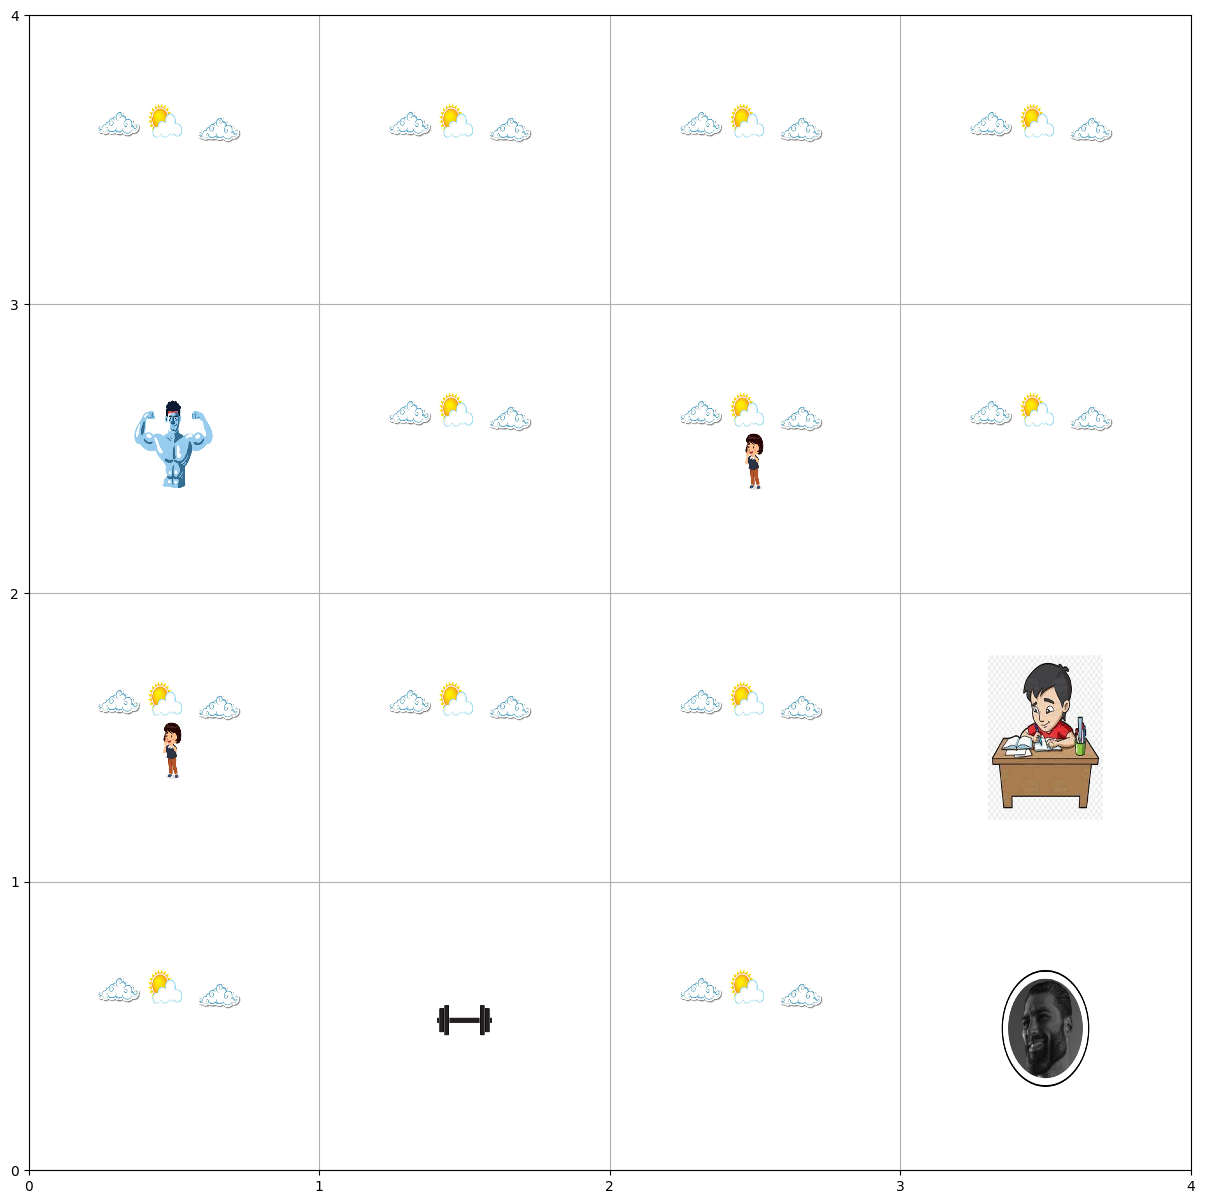

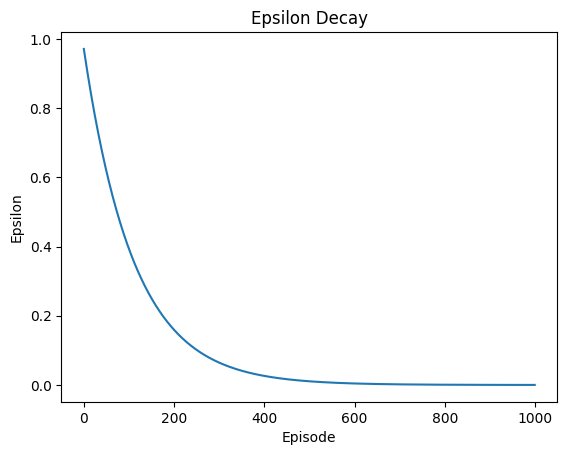

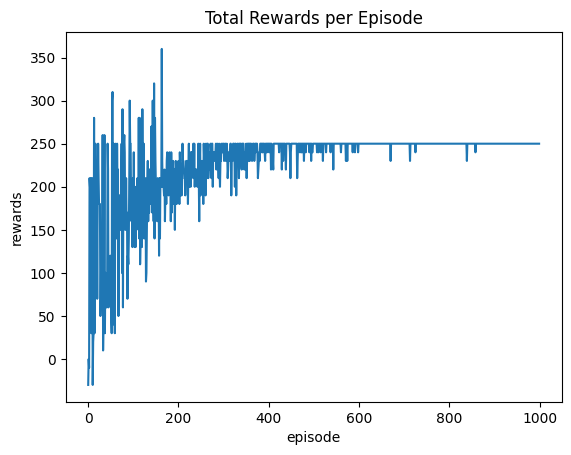

In [12]:
grid = {
    (0, 0): 0, (0, 1): 1, (0, 2): 2, (0, 3): 3, 
    (1, 0): 4, (1, 1): 5, (1, 2): 6, (1, 3): 7,
    (2, 0): 8, (2, 1): 9, (2, 2): 10, (2, 3): 11,
    (3, 0): 12, (3, 1): 13, (3, 2): 14, (3, 3): 15
}

sarsa_agent=SarsaAgent(grid=grid, alpha=0.1, gamma=0.99, epsilon=0.98, epsilon_decay=0.009, episodes=1000)

arr, final_res = sarsa_agent.train()

plt.plot(arr)
plt.title('Epsilon Decay')
plt.ylabel('Epsilon')
plt.xlabel('Episode')
plt.show()

plt.plot(final_res)
plt.title('Total Rewards per Episode')
plt.ylabel('rewards')
plt.xlabel('episode')
plt.show()


WITH HYPERPARAMETERS CHANGED

Reward value for current step: 10
Reward value for current step: 0
Reward value for current step: -10
Reward value for current step: 0
Reward value for current step: 0
Reward value for current step: 0
Reward value for current step: 0
Reward value for current step: 10
Reward value for current step: 10
Reward value for current step: 10
Reward value for current step: 0
Reward value for current step: 0
Reward value for current step: 0
Reward value for current step: 10
Reward value for current step: 0
Reward value for current step: 200
Reward value for current step: 0
Reward value for current step: 0
Reward value for current step: 0
Reward value for current step: 0
Reward value for current step: 0
Reward value for current step: 10
Reward value for current step: 0
Reward value for current step: 0
Reward value for current step: 0
Reward value for current step: 10
Reward value for current step: -10
Reward value for current step: 0
Reward value for current step: -10
Reward value for current ste

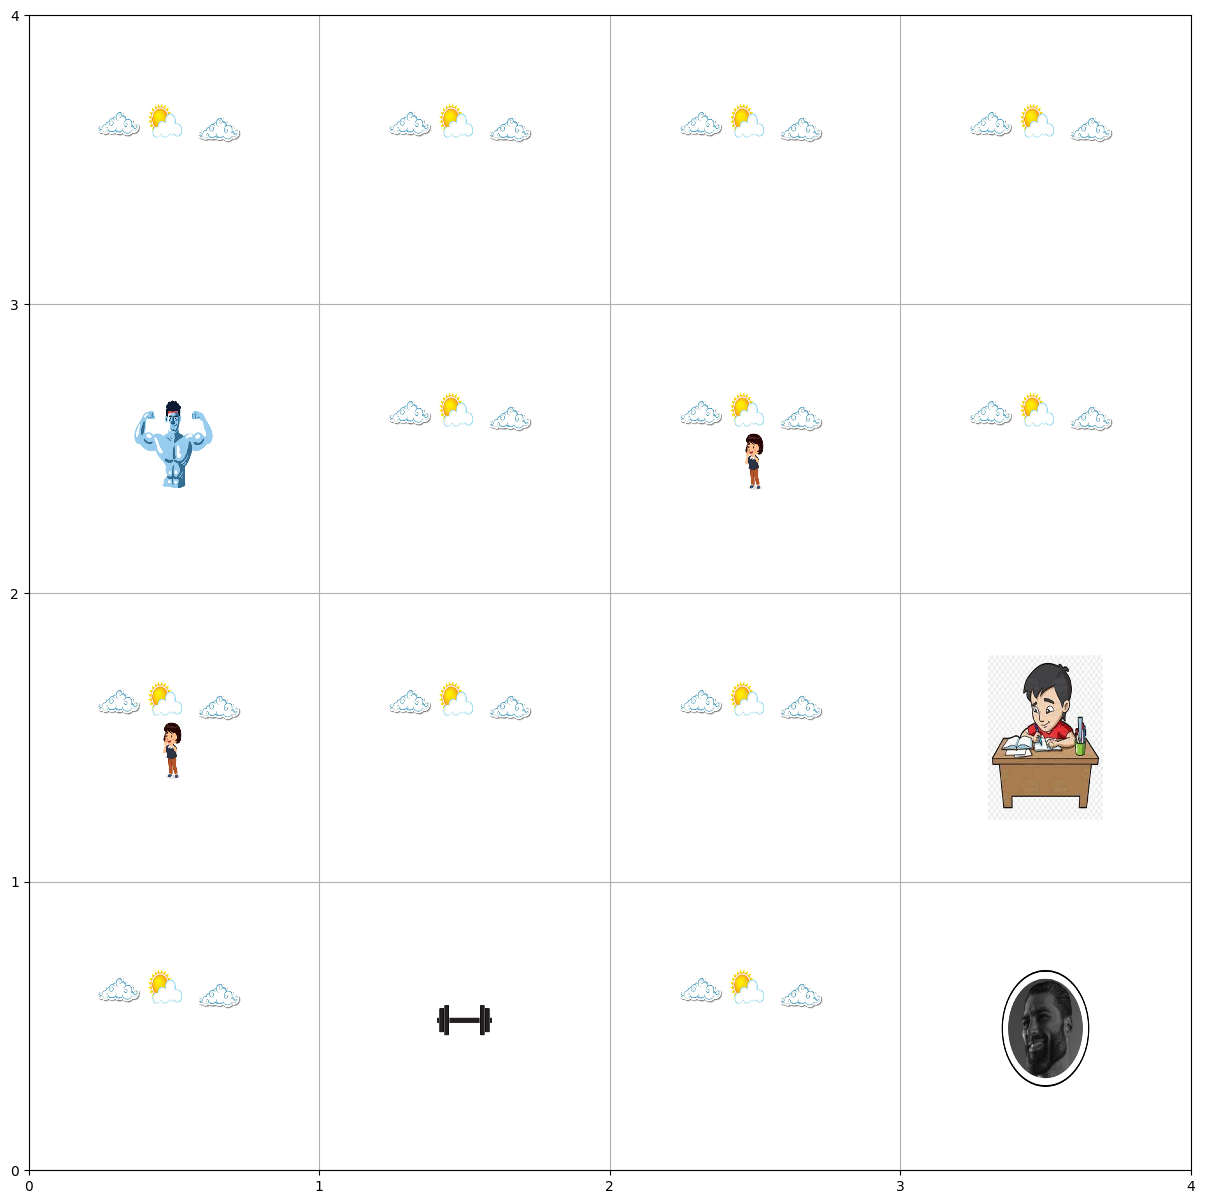

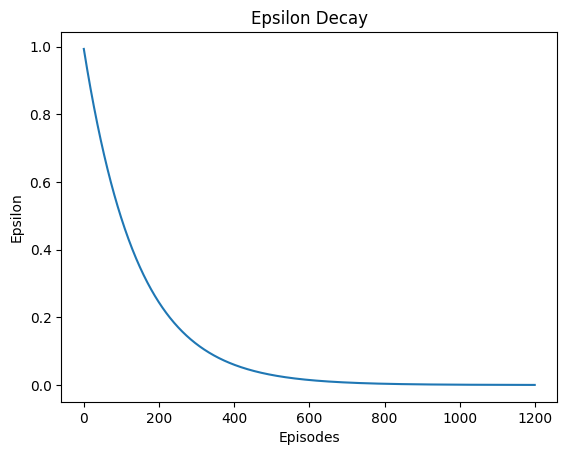

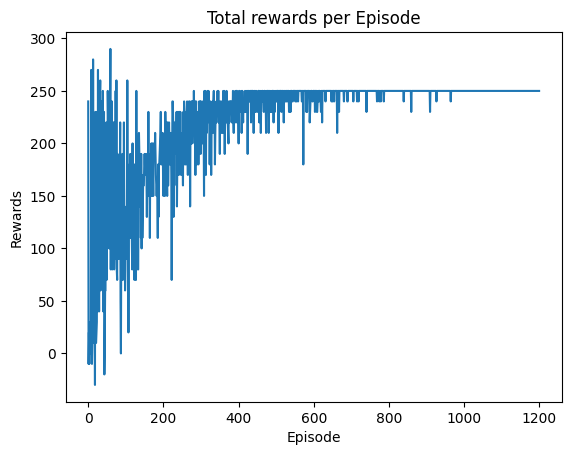

In [13]:
grid = {
    (0, 0): 0, (0, 1): 1, (0, 2): 2, (0, 3): 3, 
    (1, 0): 4, (1, 1): 5, (1, 2): 6, (1, 3): 7,
    (2, 0): 8, (2, 1): 9, (2, 2): 10, (2, 3): 11,
    (3, 0): 12, (3, 1): 13, (3, 2): 14, (3, 3): 15
}

sarsa_agent=SarsaAgent(grid=grid, alpha=0.2, gamma=0.99, epsilon=1, epsilon_decay=0.007, episodes=1200)

arr, final_res = sarsa_agent.train()

plt.plot(arr)
plt.title('Epsilon Decay')
plt.ylabel('Epsilon')
plt.xlabel('Episodes')
plt.show()

plt.plot(final_res)
plt.title('Total rewards per Episode')
plt.ylabel('Rewards')
plt.xlabel('Episode')
plt.show()


Reward value for current step: 0
Reward value for current step: 10
Reward value for current step: 10
Reward value for current step: 10
Reward value for current step: -10
Reward value for current step: 0
Reward value for current step: 0
Reward value for current step: -10
Reward value for current step: 0
Reward value for current step: -10
Reward value for current step: 0
Reward value for current step: -10
Reward value for current step: 0
Reward value for current step: 0
Reward value for current step: 0
Reward value for current step: 0
Reward value for current step: 0
Reward value for current step: 0
Reward value for current step: 0
Reward value for current step: 10
Reward value for current step: 10
Reward value for current step: 0
Reward value for current step: 0
Reward value for current step: 0
Reward value for current step: 10
Reward value for current step: -10
Reward value for current step: -10
Reward value for current step: 0
Reward value for current step: 0
Reward value for current 

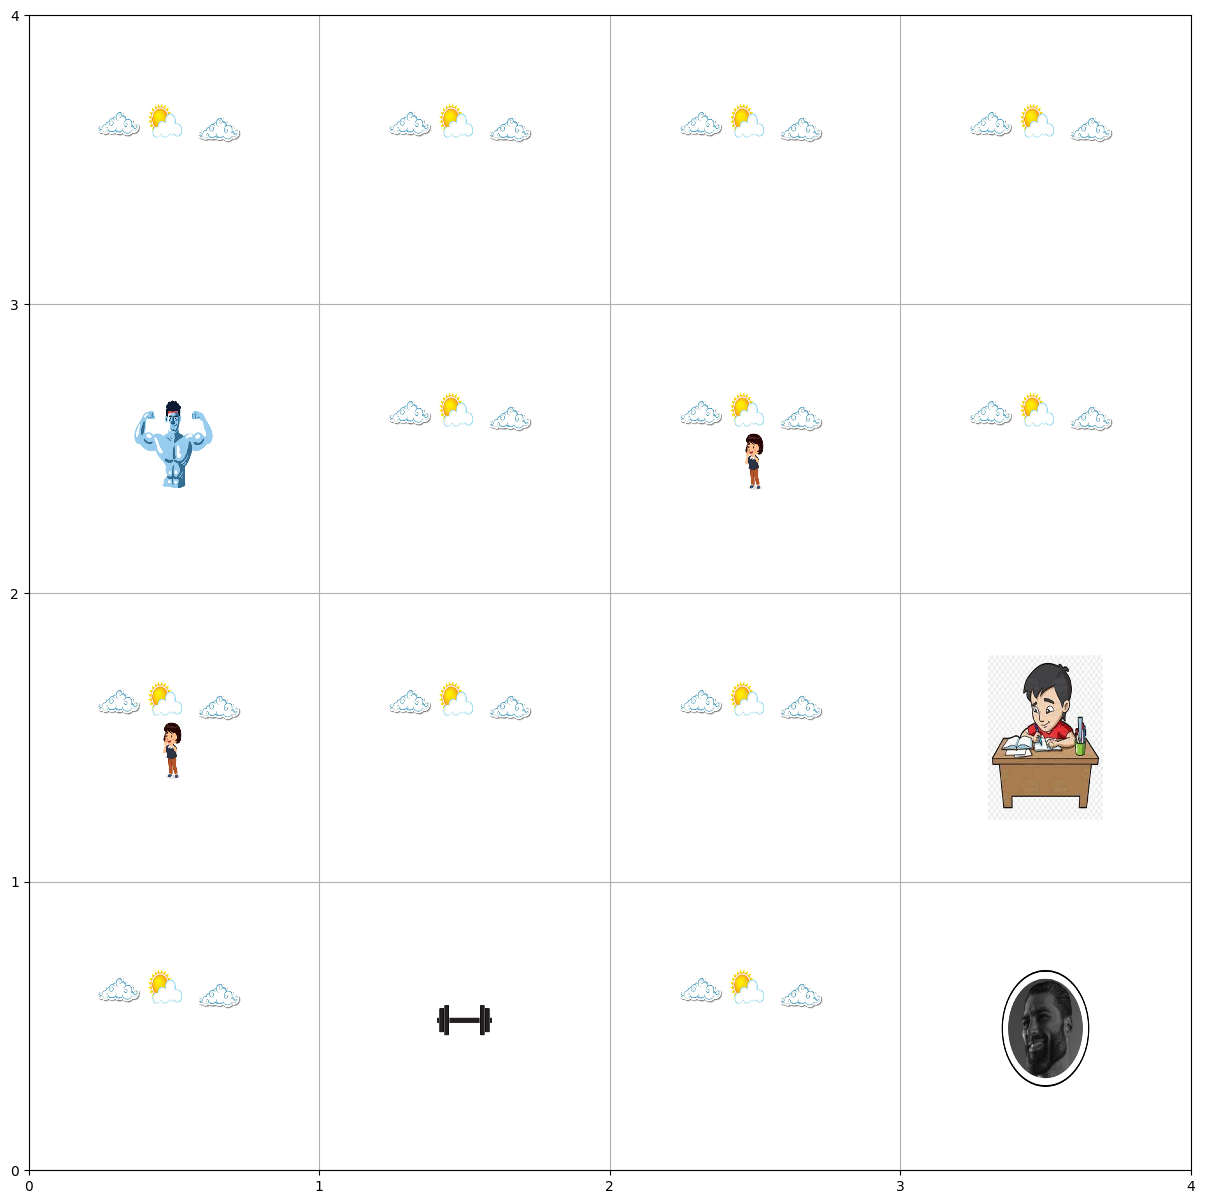

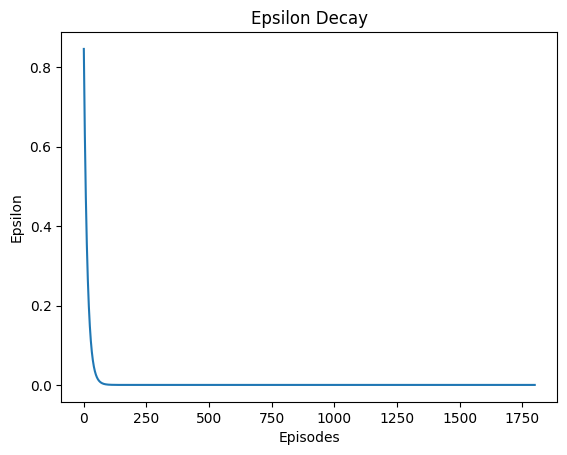

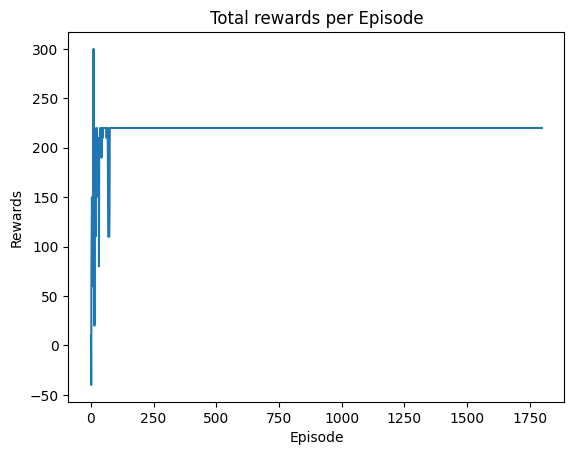

In [26]:
grid = {
    (0, 0): 0, (0, 1): 1, (0, 2): 2, (0, 3): 3, 
    (1, 0): 4, (1, 1): 5, (1, 2): 6, (1, 3): 7,
    (2, 0): 8, (2, 1): 9, (2, 2): 10, (2, 3): 11,
    (3, 0): 12, (3, 1): 13, (3, 2): 14, (3, 3): 15
}

sarsa_agent=SarsaAgent(grid=grid, alpha=0.3, gamma=0.99, epsilon=0.91, epsilon_decay=0.07, episodes=1800)

arr, final_res = sarsa_agent.train()

plt.plot(arr)
plt.title('Epsilon Decay')
plt.ylabel('Epsilon')
plt.xlabel('Episodes')
plt.show()

plt.plot(final_res)
plt.title('Total rewards per Episode')
plt.ylabel('Rewards')
plt.xlabel('Episode')
plt.show()


#References Nitin Kulkarni Wumpus Py file uploaded on Piaza

## Part 3

In [14]:
import numpy as np
import random

class QLearningAgent:
    
    def __init__(self, grid, alpha=0.1, gamma=0.99, epsilon=0.98, epsilon_decay=0.009, episodes=100):
        self.dict_q1 = {}
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon
        self.epsilon_decay = epsilon_decay
        self.episodes = episodes
        self.stateMap = grid
        self.arr = []
        for state in grid.values():
            self.dict_q1[state] = np.zeros(4)
  
    def choose_nextaction(self, q_values, epsilon=0.01):
        actions = [0, 1, 2, 3]
        if np.random.rand() < epsilon:
            selected_action = random.choice(actions)
        else:
            selected_action = np.argmax(q_values)
        return selected_action
    
    def Q_value_calculation(self, reward, new_state, dict_q1, action, old_state):
        new_state = grid.get(tuple(new_state["position"]))
        q_old = dict_q1[old_state][int(action)]
        max_q_new_action = np.max(dict_q1[new_state])
        dict_q1[old_state][int(action)] += self.alpha * (reward + (self.gamma * max_q_new_action) - q_old)
        return dict_q1[old_state][int(action)]
  
    def train(self):
        final_res = []
        c=0

        epsilon = self.epsilon
        epsilon_decay = self.epsilon_decay
        actions = [0, 1, 2, 3]
        env = Loveworld()
        env.reset()
        for i in range(self.episodes):
            env.reset()
            reward1 = 0
            result = False
        
    
       
            max_steps_per_episode=800
            for step in range(max_steps_per_episode):
                random_value = np.random.random()            
                state = grid.get(tuple(env.position))
                if(random_value < epsilon):
                    selected_action = random.choice(actions)
                else:
                    selected_action = np.argmax(self.dict_q1[state])
                new_state, reward, result, info1 = env.step(selected_action)
                self.Q_value_calculation(reward, new_state, self.dict_q1, selected_action, state)
                reward1 += reward
                #print("Reward value for current step:", reward)

                if result:
                    # final_res.append(reward1)
                    break
      
       
            final_res.append(reward1)
                    
            epsilon -= (epsilon * epsilon_decay)
            self.arr.append(epsilon)
                
        #env.render() 
        return self.arr, final_res



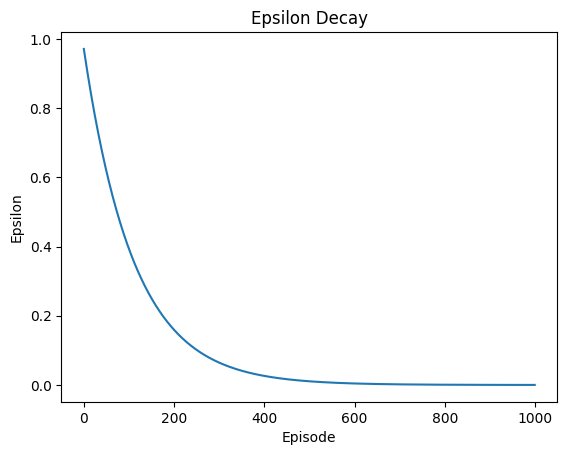

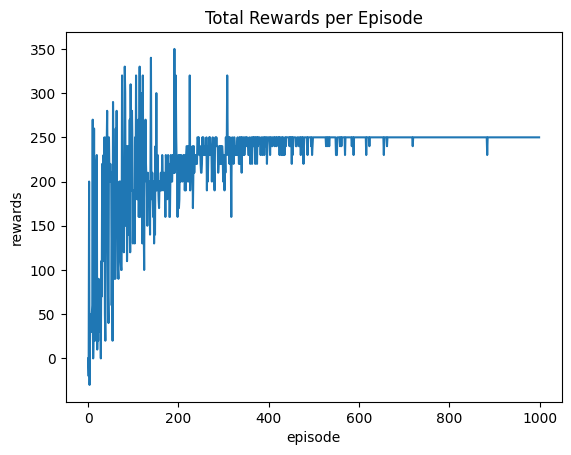

In [15]:
grid = {
    (0, 0): 0, (0, 1): 1, (0, 2): 2, (0, 3): 3, 
    (1, 0): 4, (1, 1): 5, (1, 2): 6, (1, 3): 7,
    (2, 0): 8, (2, 1): 9, (2, 2): 10, (2, 3): 11,
    (3, 0): 12, (3, 1): 13, (3, 2): 14, (3, 3): 15
}

qlearning_Agent=QLearningAgent(grid=grid, alpha=0.1, gamma=0.99, epsilon=0.98, epsilon_decay=0.009, episodes=1000)

arr, final_res = qlearning_Agent.train()

plt.plot(arr)
plt.title('Epsilon Decay')
plt.ylabel('Epsilon')
plt.xlabel('Episode')
plt.show()

plt.plot(final_res)
plt.title('Total Rewards per Episode')
plt.ylabel('rewards')
plt.xlabel('episode')
plt.show()

## Hyper parameter Tuning

### Epsilon decay rate

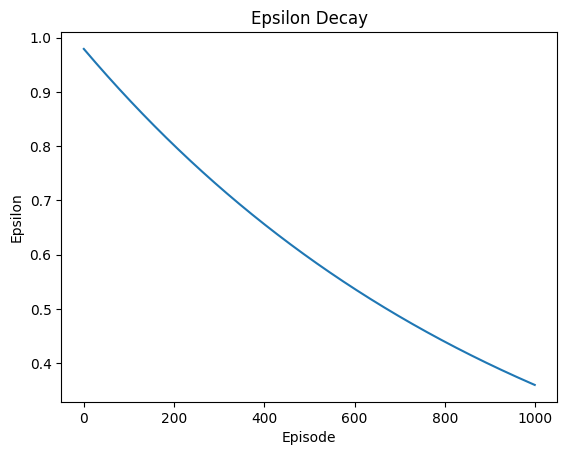

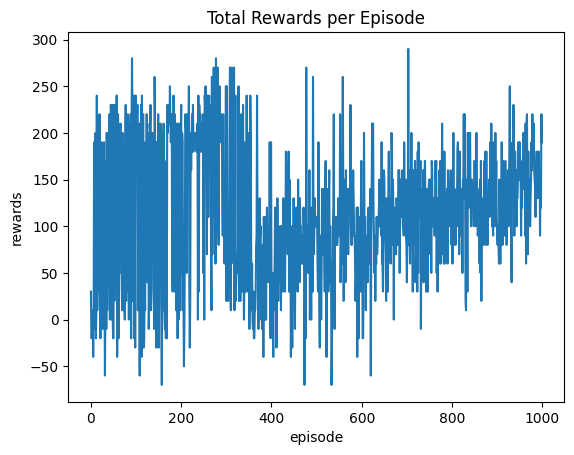

In [16]:
qlearning_Agent=QLearningAgent(grid=grid, alpha=0.1, gamma=0.99, epsilon=0.98, epsilon_decay=0.001, episodes=1000)

arr, final_res = qlearning_Agent.train()

plt.plot(arr)
plt.title('Epsilon Decay')
plt.ylabel('Epsilon')
plt.xlabel('Episode')
plt.show()

plt.plot(final_res)
plt.title('Total Rewards per Episode')
plt.ylabel('rewards')
plt.xlabel('episode')
plt.show()

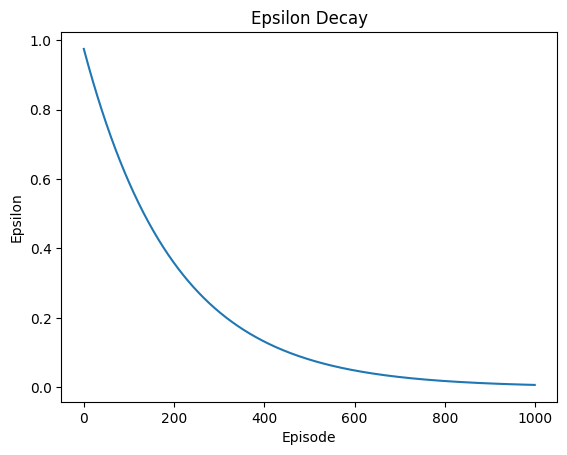

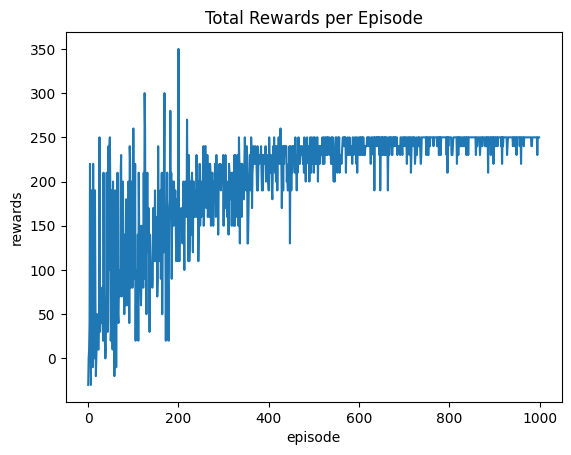

In [17]:

qlearning_Agent=QLearningAgent(grid=grid, alpha=0.1, gamma=0.99, epsilon=0.98, epsilon_decay=0.005, episodes=1000)

arr, final_res = qlearning_Agent.train()

plt.plot(arr)
plt.title('Epsilon Decay')
plt.ylabel('Epsilon')
plt.xlabel('Episode')
plt.show()

plt.plot(final_res)
plt.title('Total Rewards per Episode')
plt.ylabel('rewards')
plt.xlabel('episode')
plt.show()

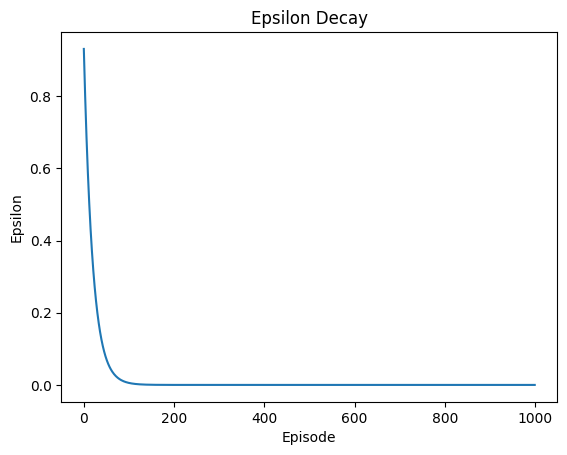

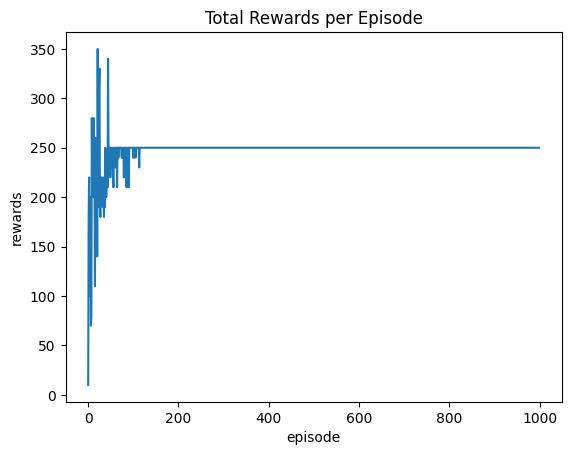

In [18]:
qlearning_Agent=QLearningAgent(grid=grid, alpha=0.1, gamma=0.99, epsilon=0.98, epsilon_decay=0.05, episodes=1000)

arr, final_res = qlearning_Agent.train()

plt.plot(arr)
plt.title('Epsilon Decay')
plt.ylabel('Epsilon')
plt.xlabel('Episode')
plt.show()

plt.plot(final_res)
plt.title('Total Rewards per Episode')
plt.ylabel('rewards')
plt.xlabel('episode')
plt.show()

### Discount Factor

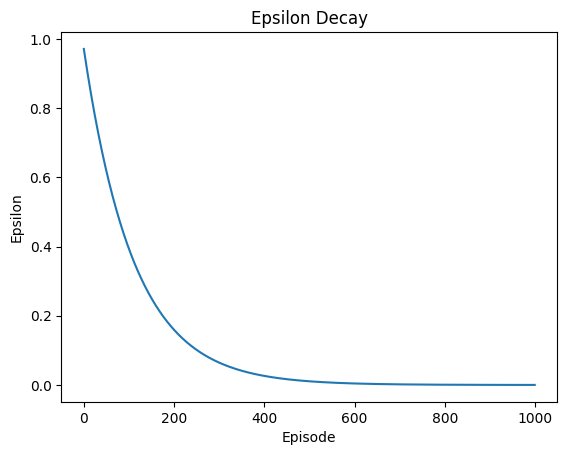

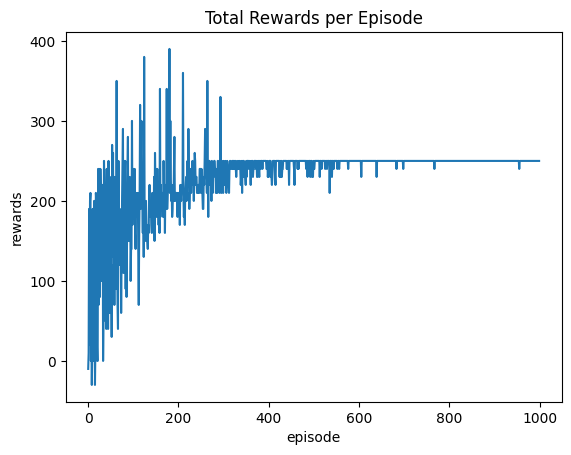

In [19]:
qlearning_Agent=QLearningAgent(grid=grid, alpha=0.1, gamma=0.5, epsilon=0.98, epsilon_decay=0.009, episodes=1000)

arr, final_res = qlearning_Agent.train()

plt.plot(arr)
plt.title('Epsilon Decay')
plt.ylabel('Epsilon')
plt.xlabel('Episode')
plt.show()

plt.plot(final_res)
plt.title('Total Rewards per Episode')
plt.ylabel('rewards')
plt.xlabel('episode')
plt.show()

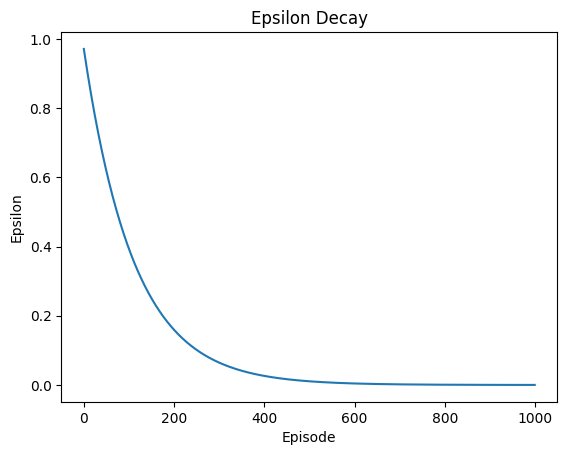

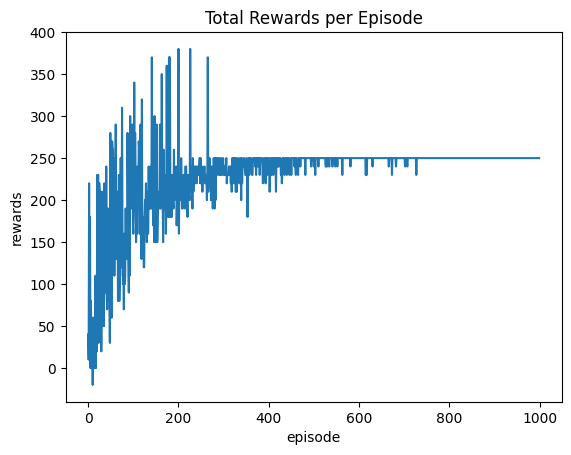

In [20]:
qlearning_Agent=QLearningAgent(grid=grid, alpha=0.5, gamma=0.1, epsilon=0.98, epsilon_decay=0.009, episodes=1000)

arr, final_res = qlearning_Agent.train()

plt.plot(arr)
plt.title('Epsilon Decay')
plt.ylabel('Epsilon')
plt.xlabel('Episode')
plt.show()

plt.plot(final_res)
plt.title('Total Rewards per Episode')
plt.ylabel('rewards')
plt.xlabel('episode')
plt.show()

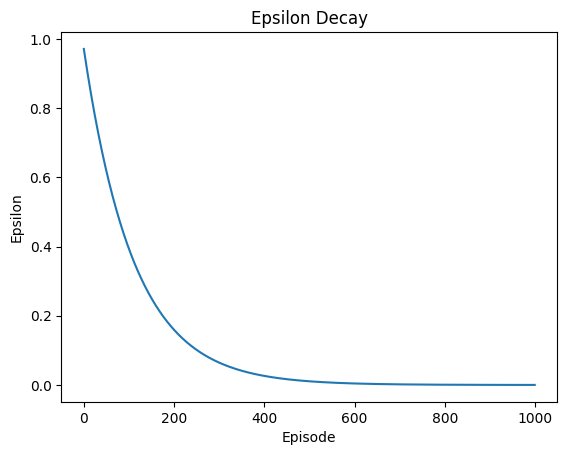

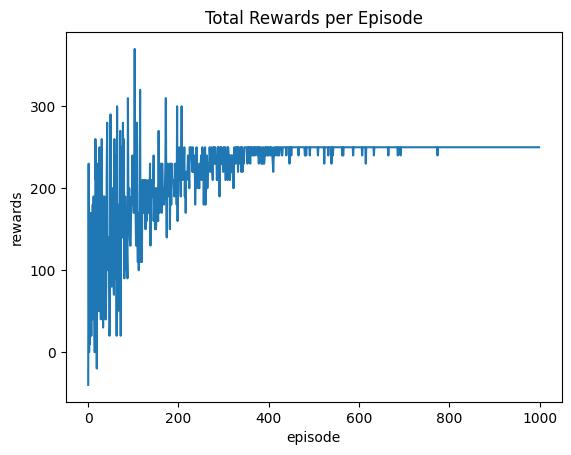

In [21]:
qlearning_Agent=QLearningAgent(grid=grid, alpha=0.005, gamma=0.7, epsilon=0.98, epsilon_decay=0.009, episodes=1000)

arr, final_res = qlearning_Agent.train()

plt.plot(arr)
plt.title('Epsilon Decay')
plt.ylabel('Epsilon')
plt.xlabel('Episode')
plt.show()

plt.plot(final_res)
plt.title('Total Rewards per Episode')
plt.ylabel('rewards')
plt.xlabel('episode')
plt.show()